In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import seaborn as sns

from n0_config_params import *
from n0bis_config_analysis_functions import *
from n0ter_stats import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# LOAD DATA

In [38]:
metric_list = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_SD1', 'HRV_SD2', 'HRV_S', 'HRV_HF', 'HRV_LF', 'HRV_LFHF', 'HRV_COV']

In [39]:
for sujet_i, sujet in enumerate(sujet_list):
    os.chdir(os.path.join(path_results, sujet, 'HRV'))
    if os.path.exists(f'{sujet}_df_hrv.xlsx'):

        if sujet_i == 0:
            df_allsujet = pd.read_excel(f'{sujet}_df_hrv.xlsx')
        else:
            df_allsujet = pd.concat((df_allsujet, pd.read_excel(f'{sujet}_df_hrv.xlsx')))

In [40]:
df_allsujet.index = np.arange(df_allsujet.index.shape[0])
df_allsujet = df_allsujet.drop(columns=['Unnamed: 0'])

for row_i in range(df_allsujet.shape[0]):

    df_allsujet['sujet'][row_i] = f"{df_allsujet['sujet'][row_i][2:]}{df_allsujet['sujet'][row_i][:2]}"

df_allsujet

/tmp/ipykernel_1887651/2983738021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allsujet['sujet'][row_i] = f"{df_allsujet['sujet'][row_i][2:]}{df_allsujet['sujet'][row_i][:2]}"


sujet     cond odor  HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_pNN50  \
0    PD01  FR_CV_1    o  842.719101  100.471919   58.219013  35.492958   
1    PD01  FR_CV_1    +  946.681388  116.954153   83.041777  44.936709   
2    PD01  FR_CV_1    -  913.603659   79.541837   56.786956  35.474006   
3    PD01     MECA    o  949.740506   81.908074   48.982018  23.174603   
4    PD01     MECA    +  957.980831  129.728100  120.393905  43.910256   
..    ...      ...  ...         ...         ...         ...        ...   
391  MA33      CO2    +  709.078014   60.009858   73.740611  19.668246   
392  MA33      CO2    -  808.932615   87.408594   78.499509  43.513514   
393  MA33  FR_CV_2    o  908.574018  106.149626  101.045504  61.818182   
394  MA33  FR_CV_2    +  717.239234   55.833358   43.409489  10.311751   
395  MA33  FR_CV_2    -  846.553672  183.861434  126.273457  41.076487   

       HRV_SD1     HRV_SD2         HRV_S    HRV_HF    HRV_LF  HRV_LFHF  \
0    41.166615  136.113163  17603.343231  0.011655  0.102813  8.821108   
1    58.711223  153.045747  28228.790355  0.036059  0.073977  2.051547   
2    40.154031  105.153431  13264.853939  0.017606  0.028420  1.614230   
3    34.634901  110.642551  12038.877869  0.006645  0.028950  4.356868   
4    85.130788  162.710935  43516.430989  0.030776  0.063194  2.053375   
..         ...         ...           ...       ...       ...       ...   
391  52.142481   67.084608  10989.158843  0.018457  0.010454  0.566420   
392  55.507439  110.612056  19288.725537  0.041802  0.021740  0.520069   
393  71.447259  131.240707  29458.050780  0.036805  0.018580  0.504817   
394  30.695027   72.816296   7021.767928  0.002495  0.007948  3.185088   
395  89.288791  244.589570  68609.578356  0.035956  0.091824  2.553811   

      HRV_COV  
0    0.090476  
1    0.083333  
2    0.056769  
3    0.055901  
4    0.069530  
..        ...  
391  0.042614  
392  0.072500  
393  0.066815  
394  0.039216  
395  0.078829  

[396 rows x 14 columns]

In [70]:
df_diff_hrv = pd.DataFrame()

for sujet in df_allsujet['sujet'].unique():

    for cond in df_allsujet['cond'].unique():

        for odor in ['+', '-']:

            diff_i = df_allsujet.query(f"sujet == '{sujet}' and cond == '{cond}' and odor == '{odor}'")[metric_list].values - df_allsujet.query(f"sujet == '{sujet}' and cond == '{cond}' and odor == 'o'")[metric_list].values
            df_i = pd.concat((pd.DataFrame({'sujet' : [sujet], 'cond' : [cond], 'odor' : [odor]}), pd.DataFrame(diff_i, columns=metric_list)), axis=1) 

            df_diff_hrv = pd.concat((df_diff_hrv, df_i), axis=0) 

df_diff_hrv

sujet     cond odor  HRV_MeanNN   HRV_SDNN  HRV_RMSSD  HRV_pNN50  \
0   PD01  FR_CV_1    +  103.962287  16.482234  24.822763   9.443751   
0   PD01  FR_CV_1    -   70.884557 -20.930082  -1.432057  -0.018952   
0   PD01     MECA    +    8.240324  47.820025  71.411887  20.735653   
0   PD01     MECA    -   26.558195  27.365865  37.662864  30.897058   
0   PD01      CO2    +  108.300104  -9.061502 -11.254948  23.940982   
..   ...      ...  ...         ...        ...        ...        ...   
0   MA33     MECA    -   49.048408 -28.244836 -19.986936  -2.048120   
0   MA33      CO2    +  -45.869089 -32.249713 -11.889790 -24.018622   
0   MA33      CO2    -   53.985511  -4.850977  -7.130892  -0.173355   
0   MA33  FR_CV_2    + -191.334784 -50.316268 -57.636016 -51.506431   
0   MA33  FR_CV_2    -  -62.020346  77.711808  25.227952 -20.741695   

      HRV_SD1     HRV_SD2         HRV_S    HRV_HF    HRV_LF  HRV_LFHF  \
0   17.544608   16.932584  10625.447124  0.024404 -0.028836 -6.769561   
0   -1.012584  -30.959732  -4338.489292  0.005950 -0.074393 -7.206879   
0   50.495887   52.068384  31477.553120  0.024131  0.034244 -2.303493   
0   26.631915   31.422006  15305.052040  0.030325  0.062408 -1.885689   
0   -7.958444  -10.225068  -5032.345274 -0.027011 -0.019656 -0.057746   
..        ...         ...           ...       ...       ...       ...   
0  -14.133754  -37.760173  -6040.116881 -0.003852 -0.005335  3.568274   
0   -8.407336  -48.671034 -11030.210424 -0.051773 -0.015543  0.196249   
0   -5.042377   -5.143585  -2730.643730 -0.028428 -0.004257  0.149898   
0  -40.752233  -58.424411 -22436.282852 -0.034309 -0.010632  2.680271   
0   17.841532  113.348863  39151.527576 -0.000849  0.073245  2.048994   

     HRV_COV  
0  -0.007143  
0  -0.033708  
0   0.013629  
0   0.029465  
0   0.001348  
..       ...  
0  -0.033850  
0  -0.027657  
0   0.002230  
0  -0.027599  
0   0.012014  

[264 rows x 14 columns]

# ALL SUJET

## cond

['o', '+', '-']


/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

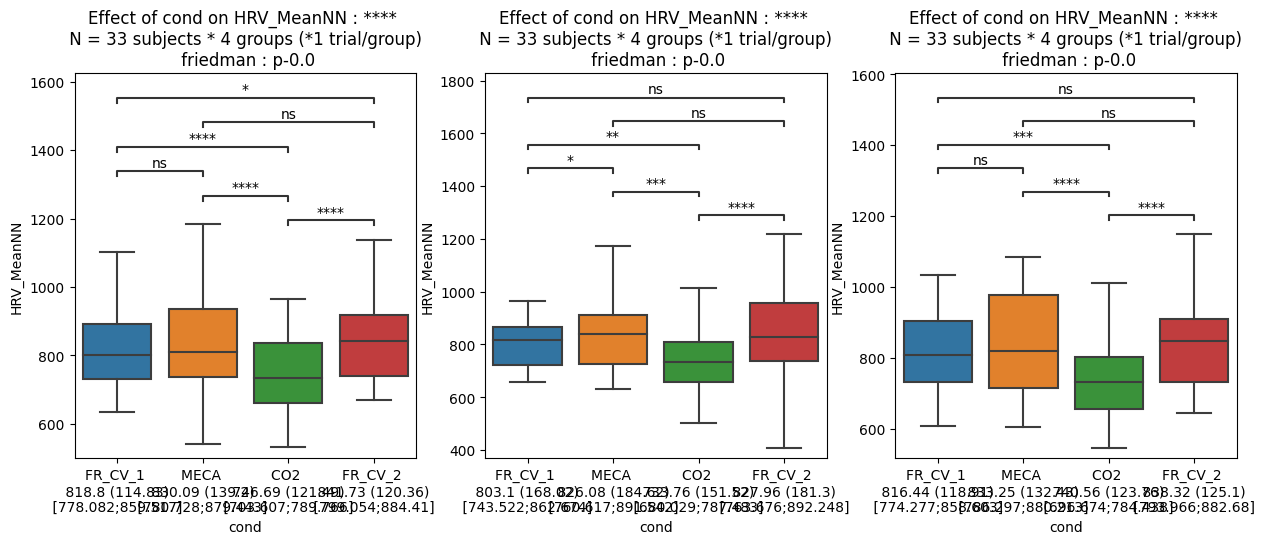

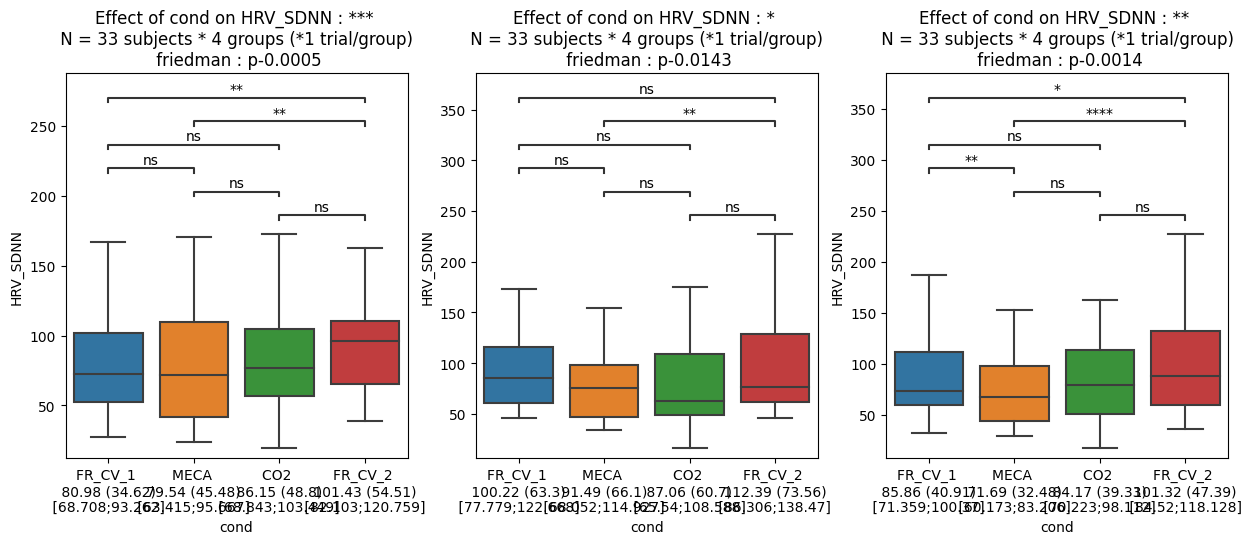

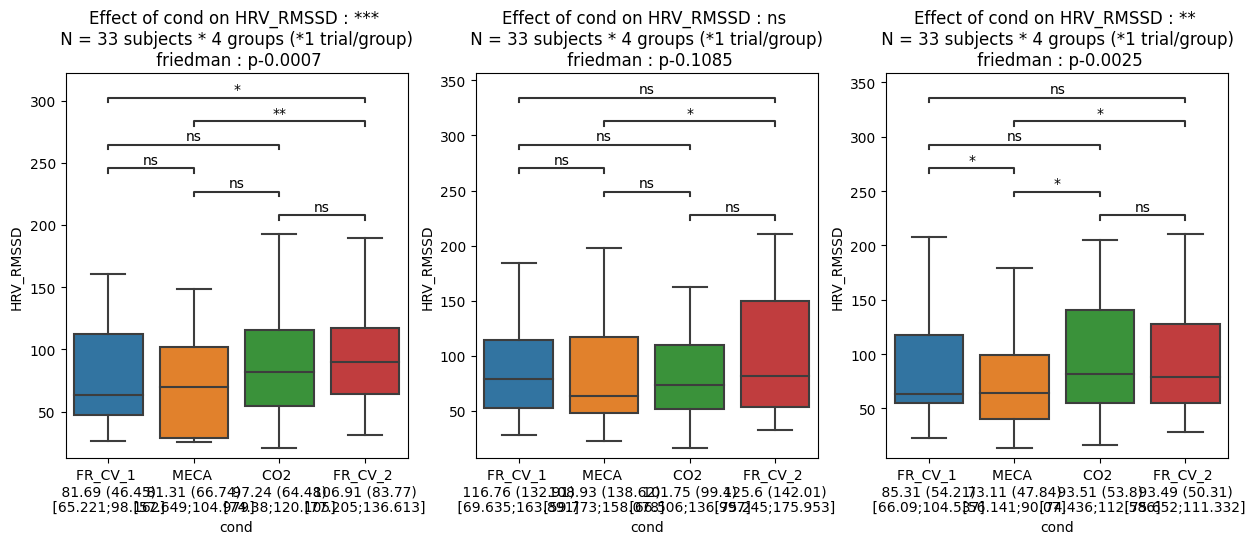

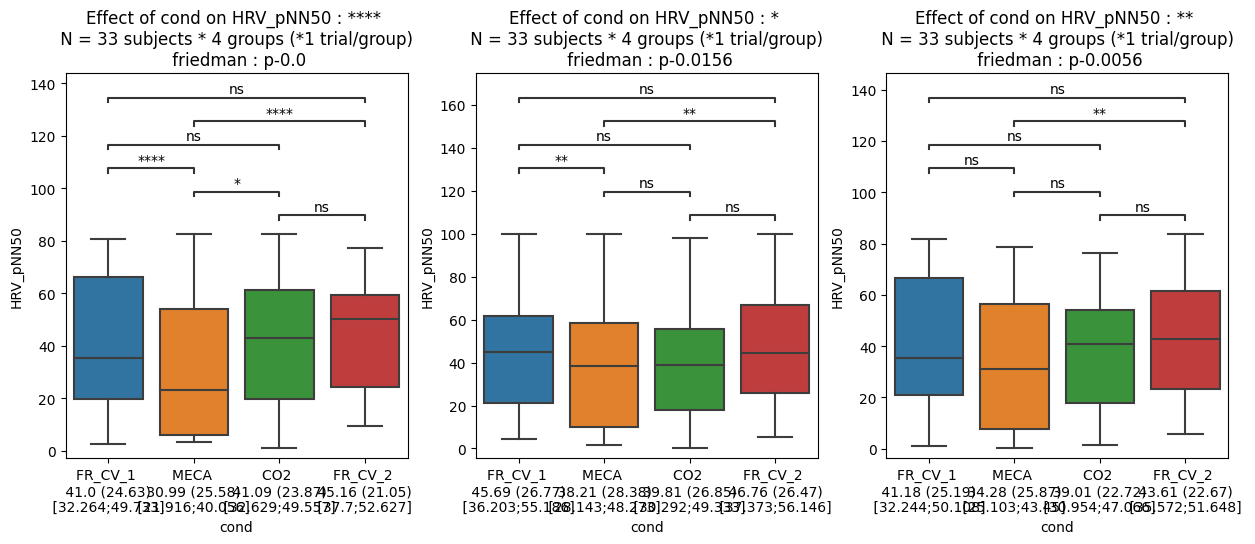

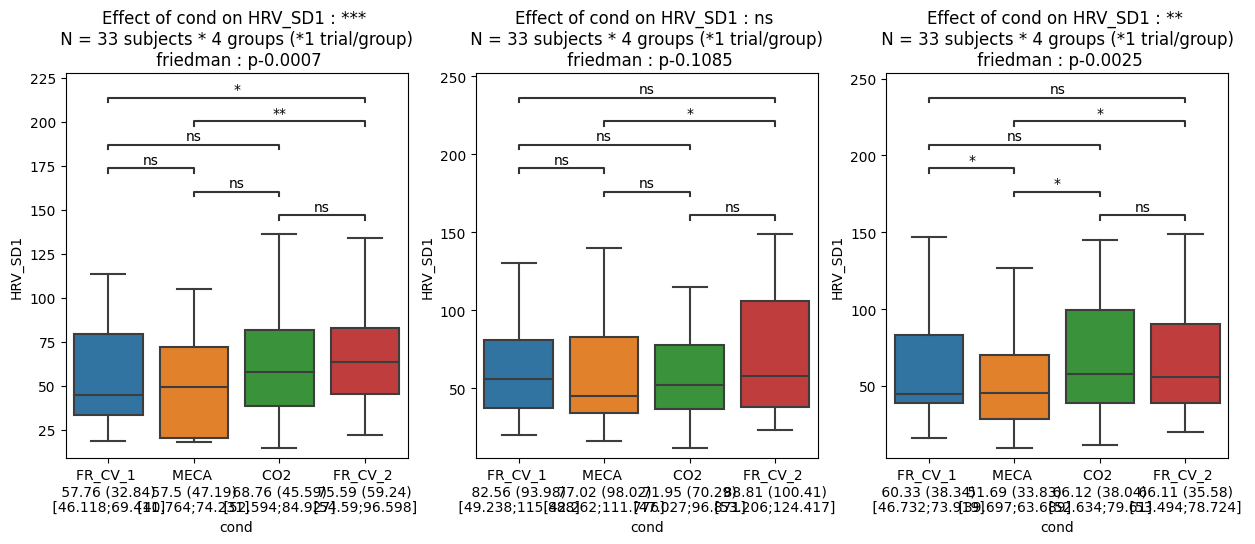

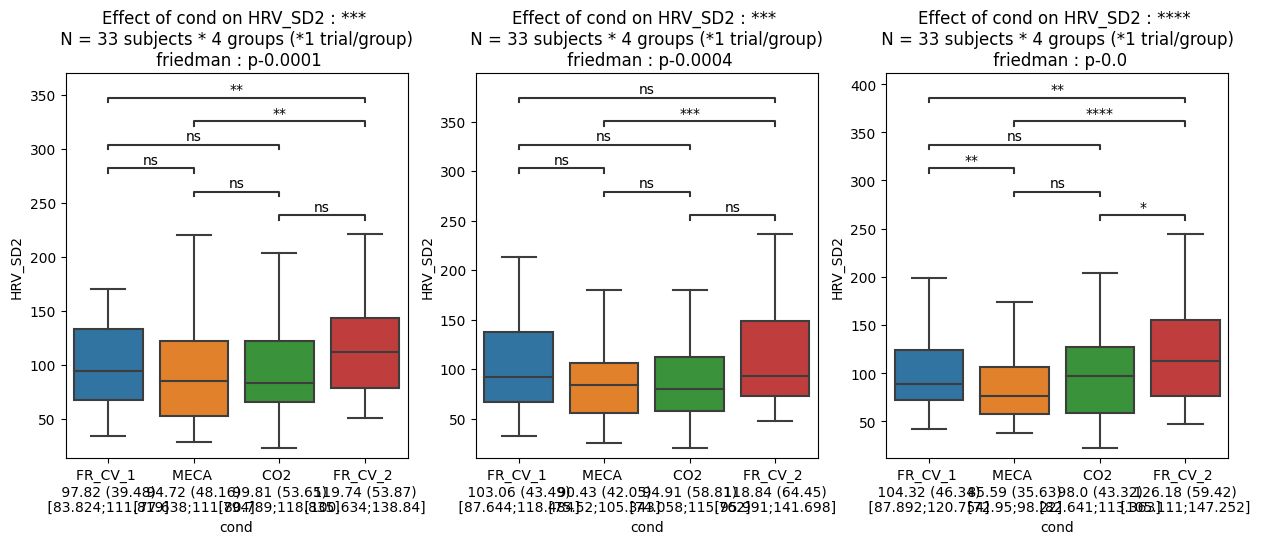

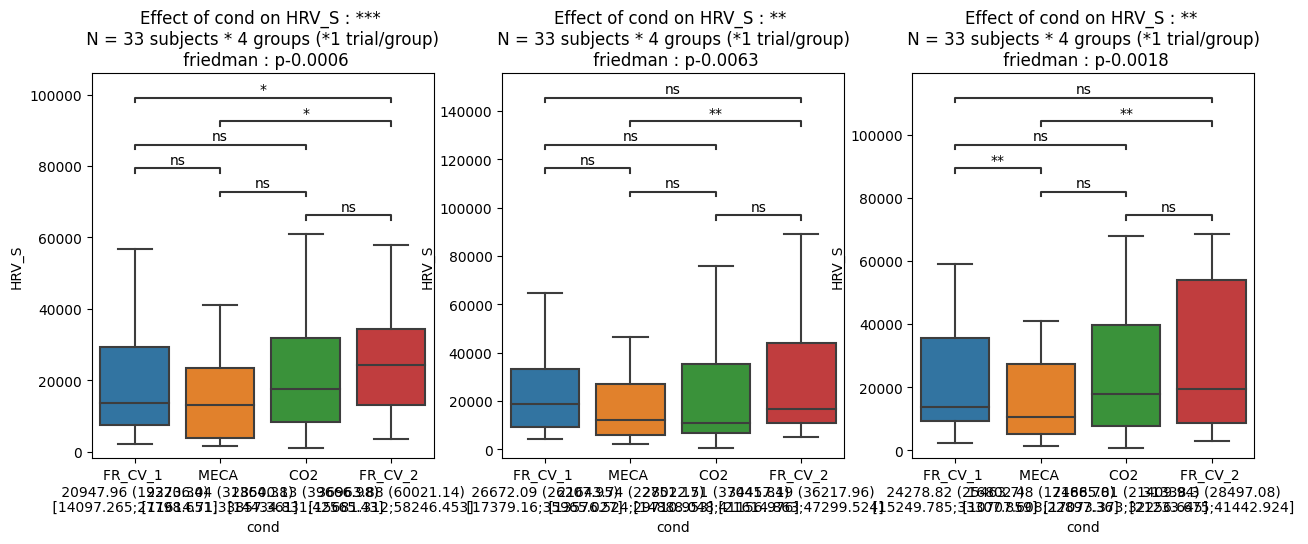

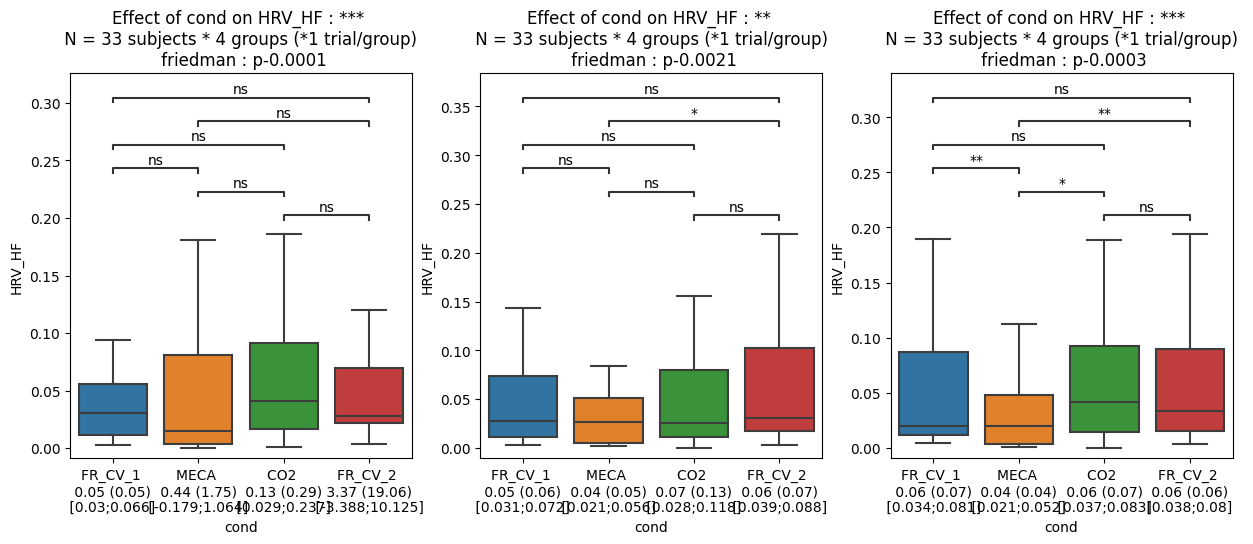

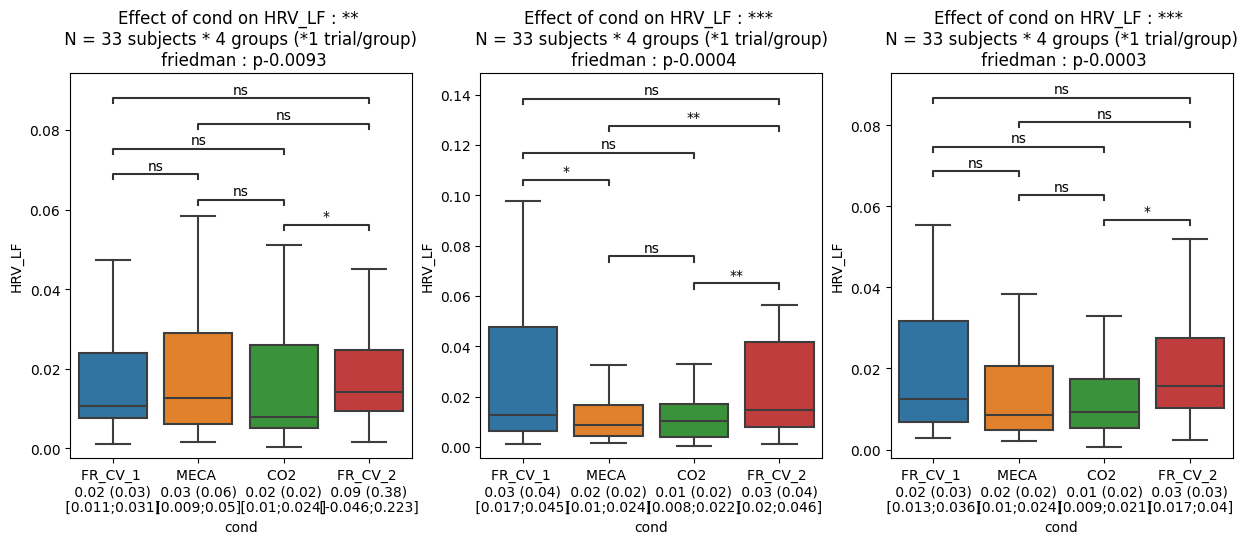

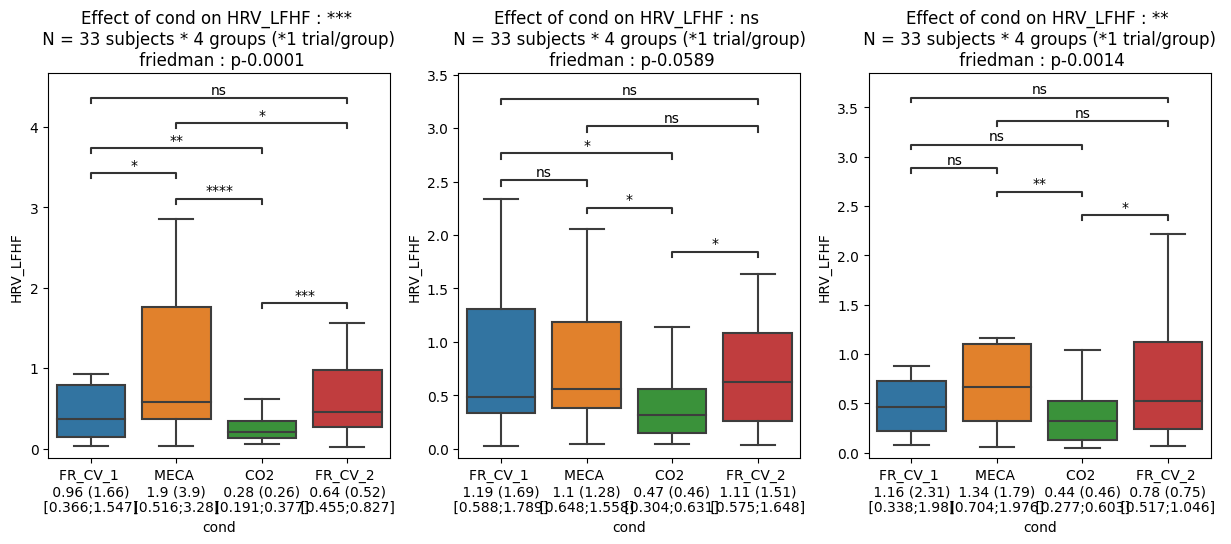

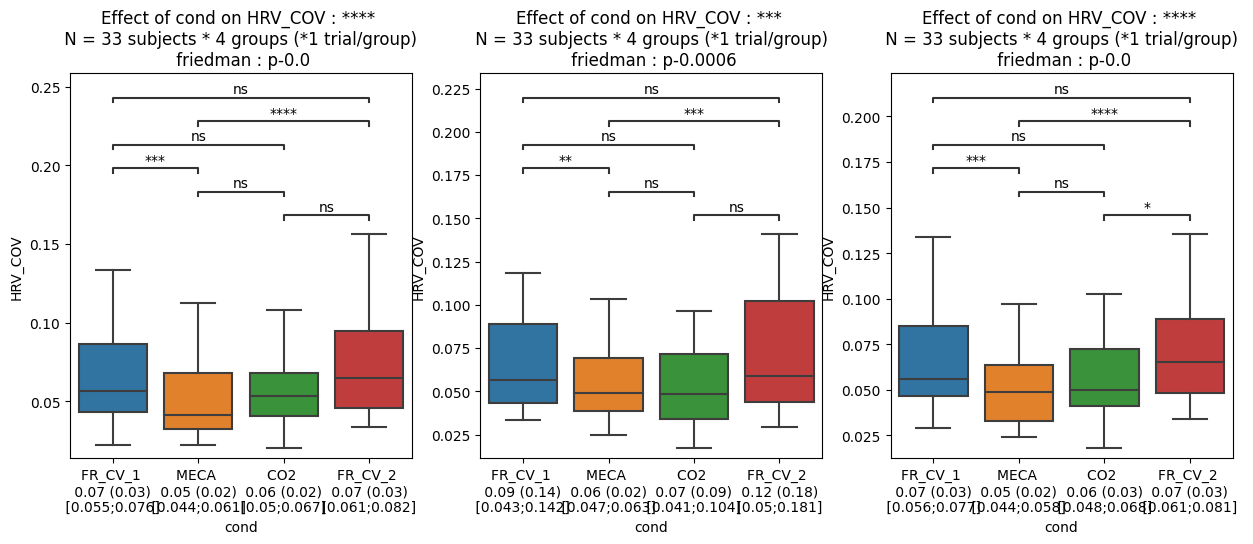

In [41]:
predictor = 'cond' 

print(odor_list)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, odor_i in enumerate(odor_list):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"odor == '{odor_i}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)


## odor

['FR_CV_1', 'MECA', 'CO2', 'FR_CV_2']


/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

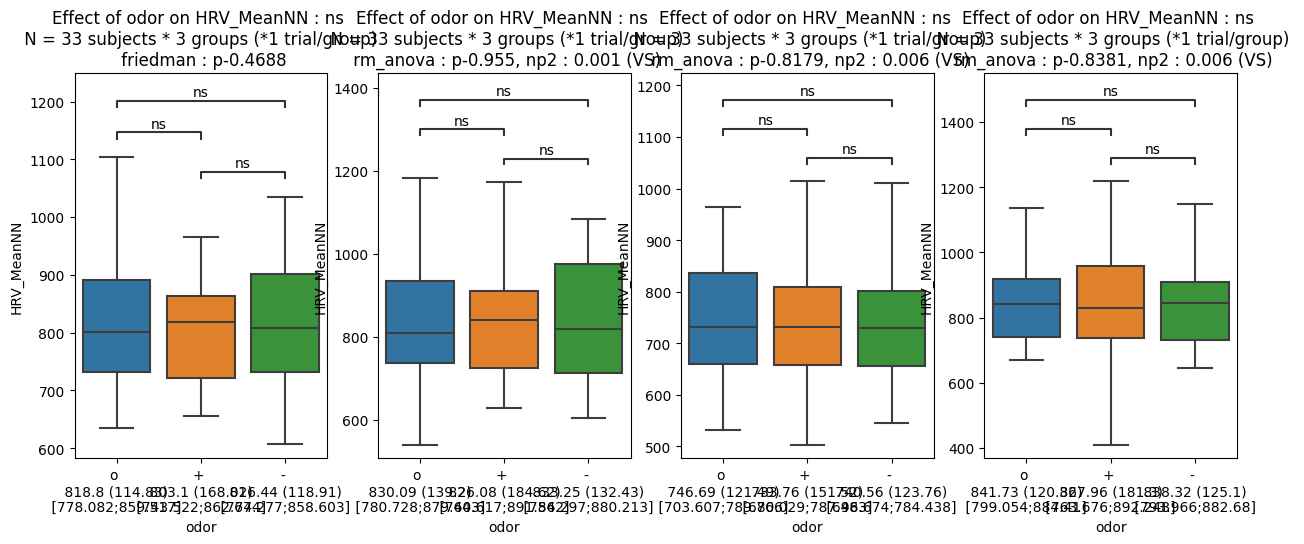

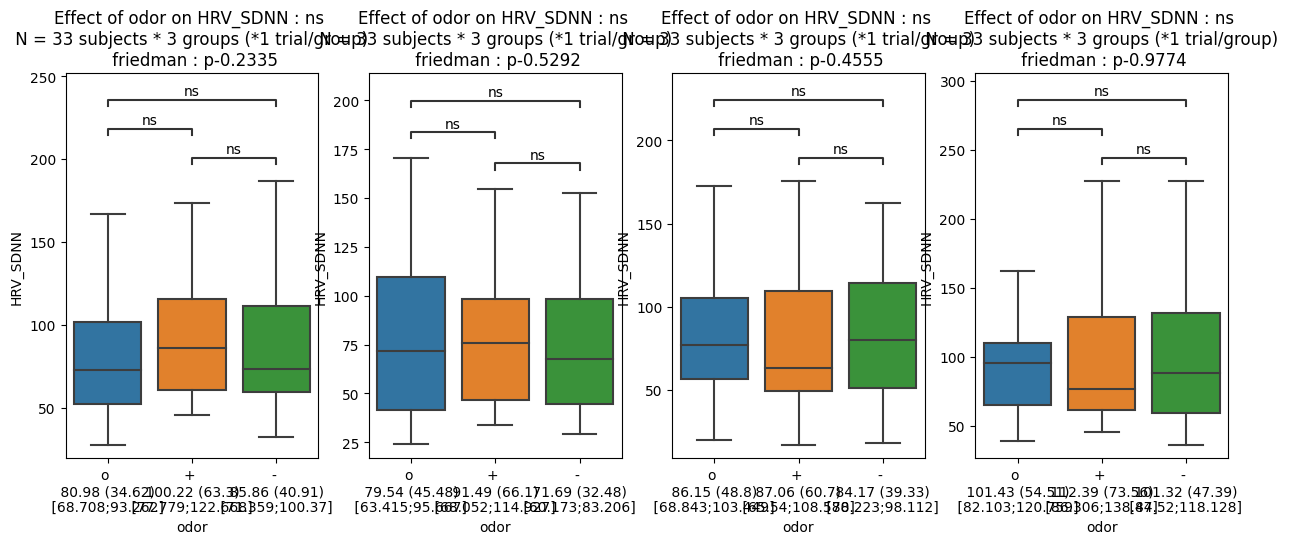

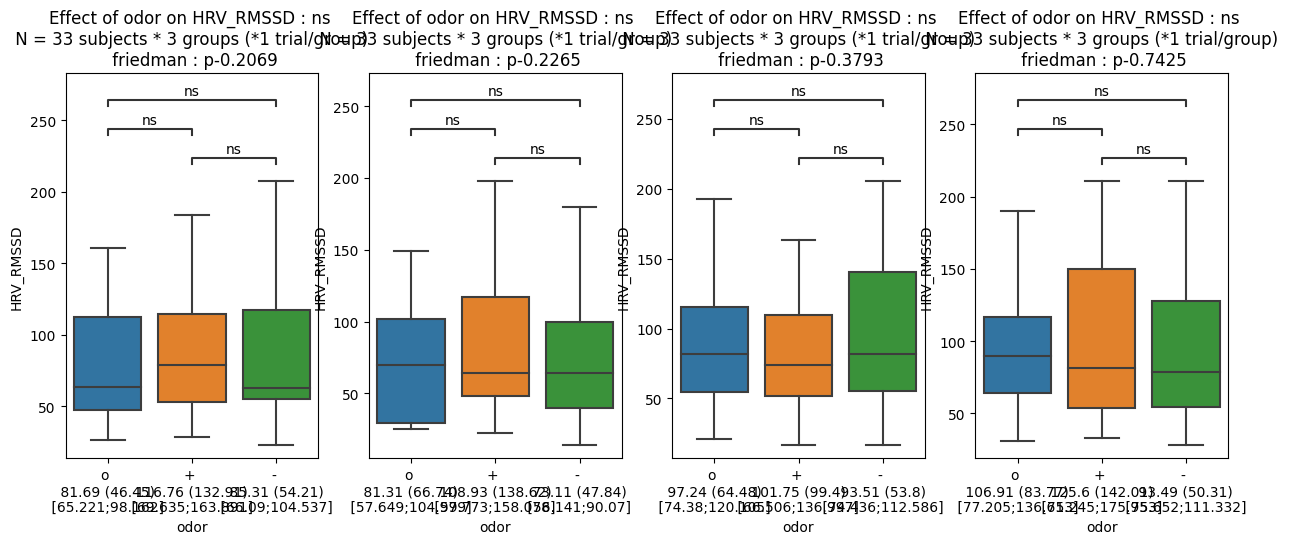

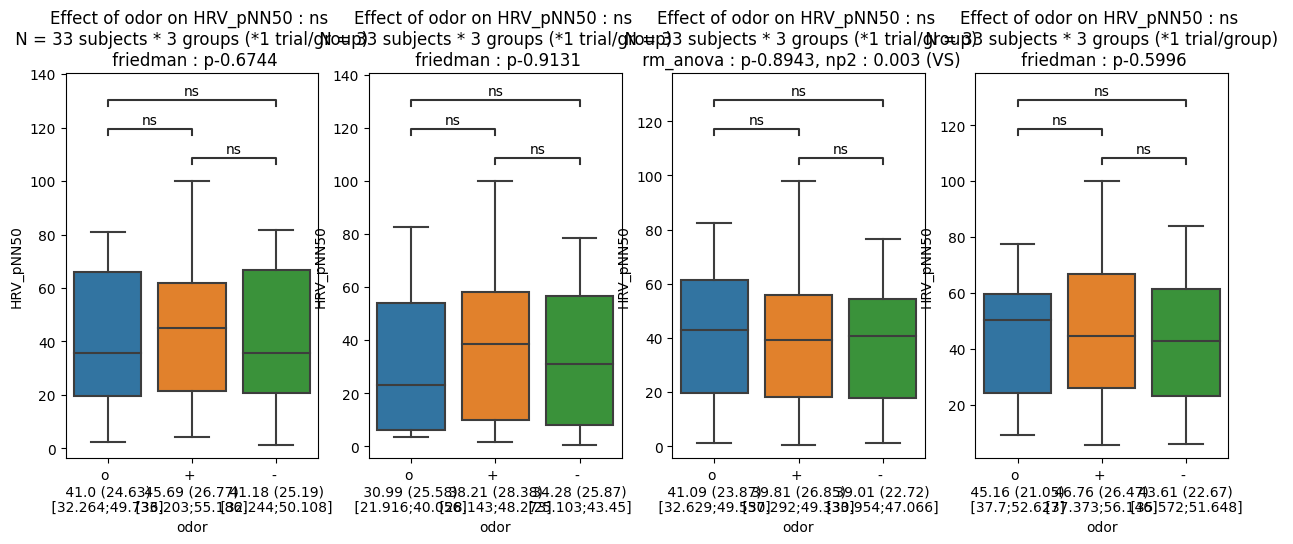

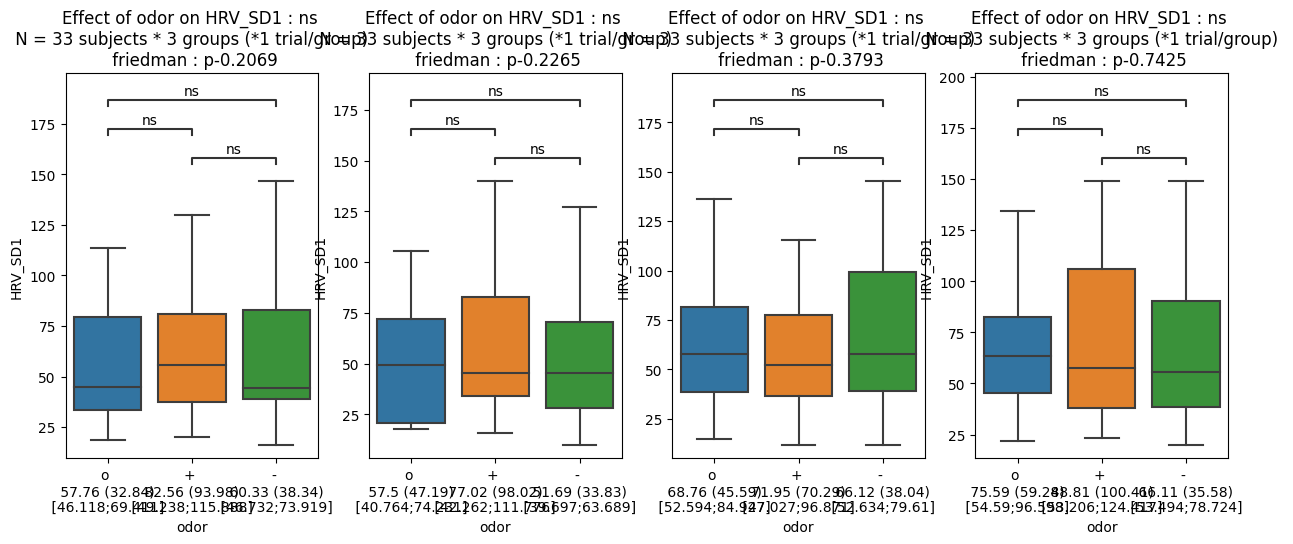

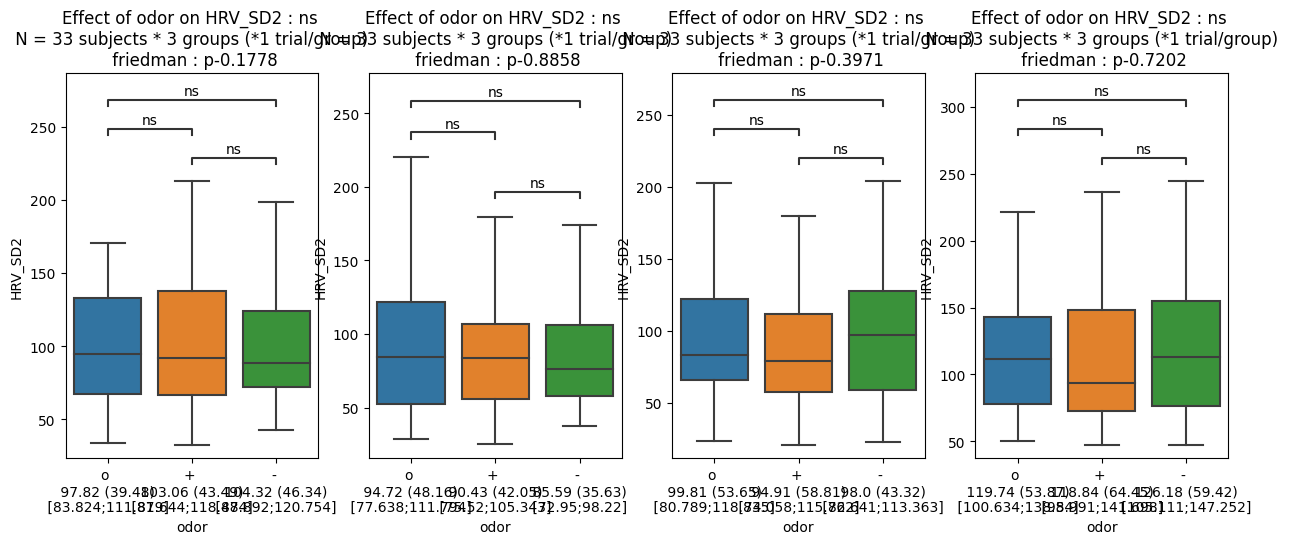

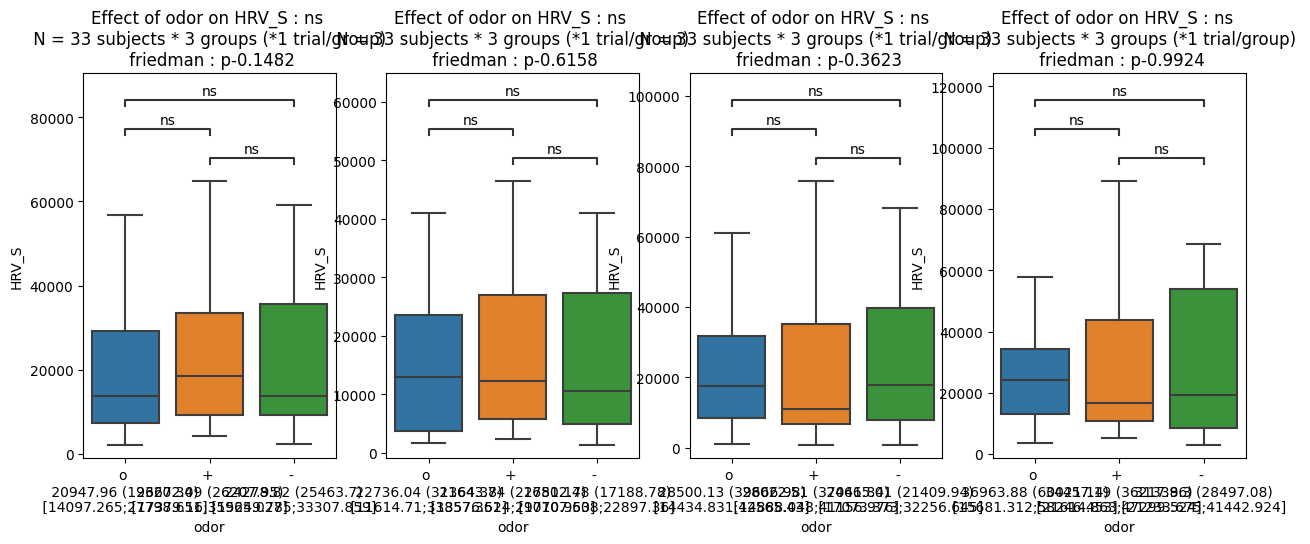

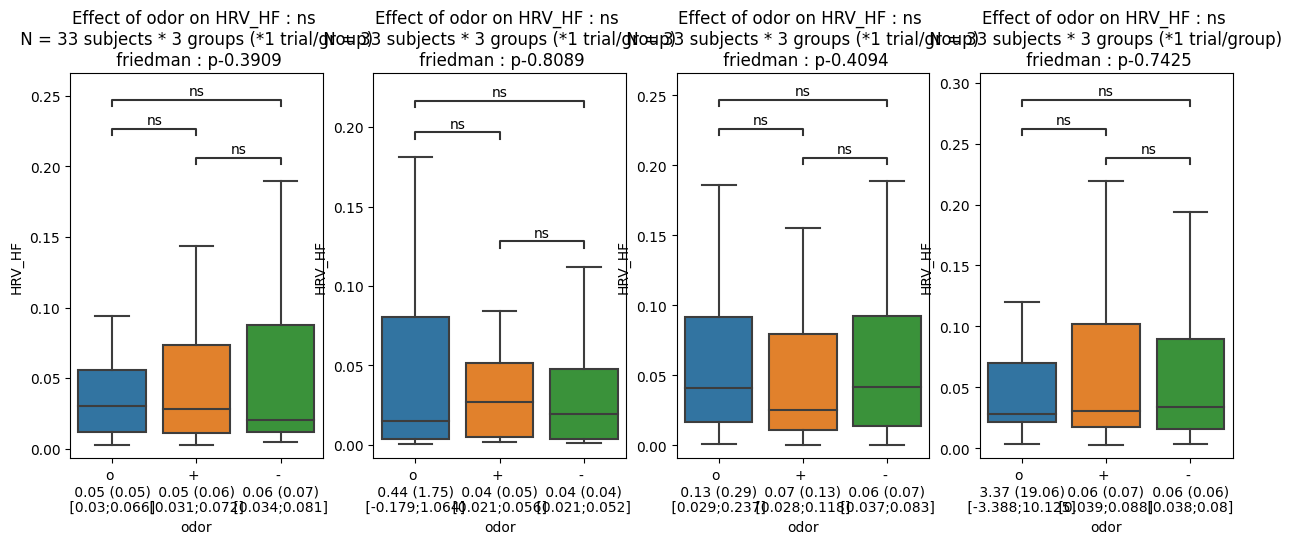

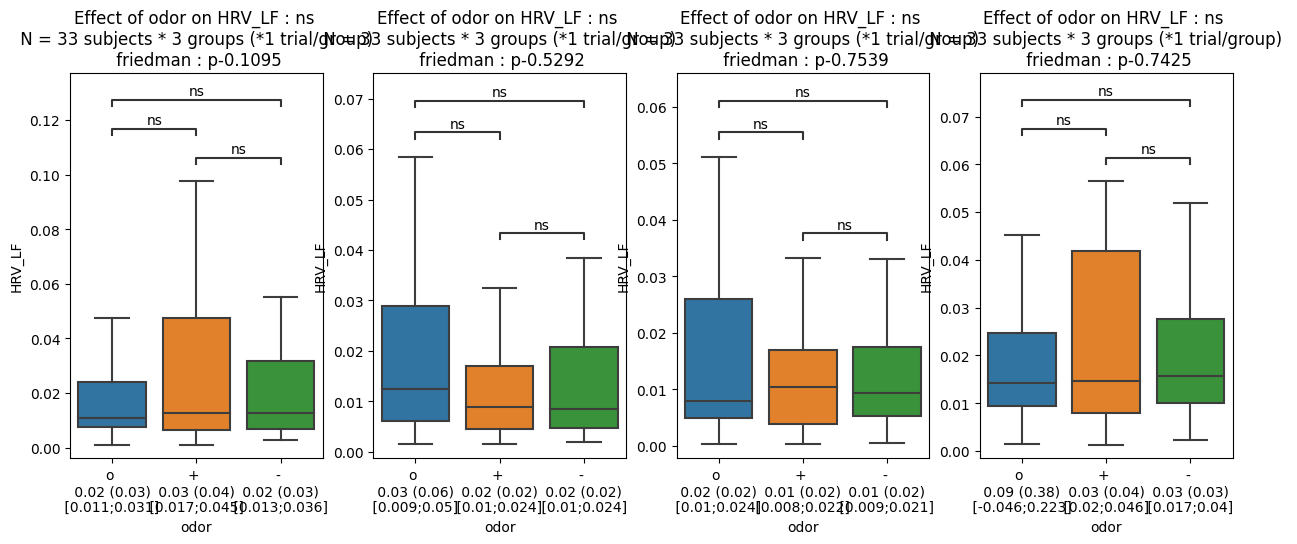

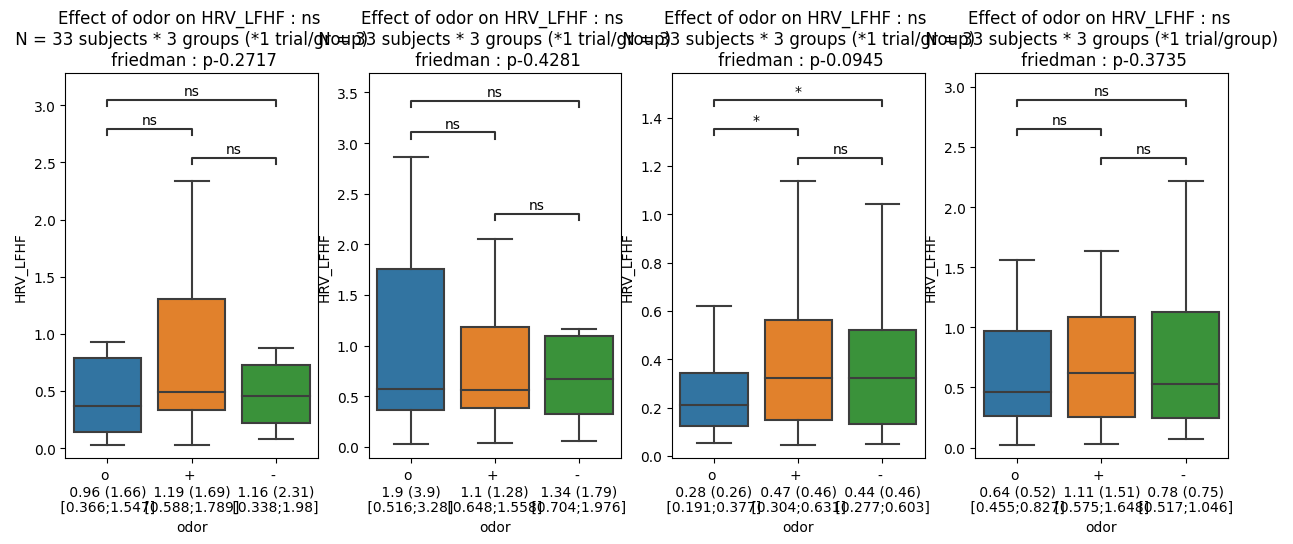

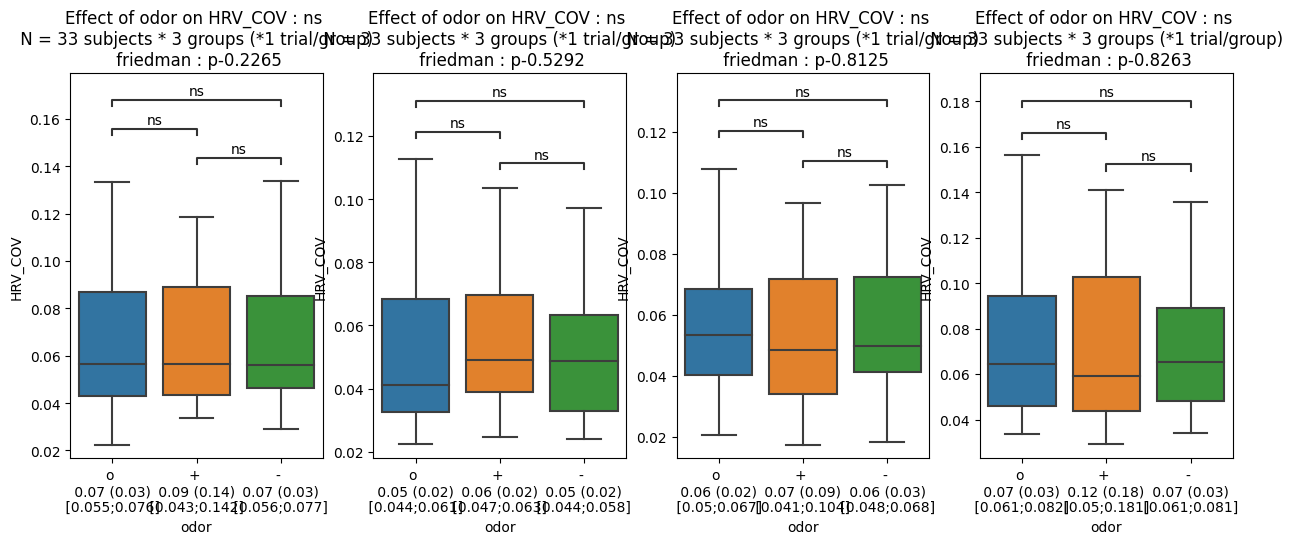

In [42]:
predictor = 'odor' 

print(conditions)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"cond == '{cond}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

# PCA

In [114]:
df_pca_allcond_diff = df_diff_hrv.copy()

select = []

for row_i in range(df_pca_allcond_diff.shape[0]):

    if df_pca_allcond_diff.iloc[row_i,:]['sujet'] in sujet_best:

        select.append('select')

    else:

        select.append('non_select')

df_pca_allcond_diff['select'] = select

df_pca_allcond_diff

sujet     cond odor  HRV_MeanNN   HRV_SDNN  HRV_RMSSD  HRV_pNN50  \
0   PD01  FR_CV_1    +  103.962287  16.482234  24.822763   9.443751   
0   PD01  FR_CV_1    -   70.884557 -20.930082  -1.432057  -0.018952   
0   PD01     MECA    +    8.240324  47.820025  71.411887  20.735653   
0   PD01     MECA    -   26.558195  27.365865  37.662864  30.897058   
0   PD01      CO2    +  108.300104  -9.061502 -11.254948  23.940982   
..   ...      ...  ...         ...        ...        ...        ...   
0   MA33     MECA    -   49.048408 -28.244836 -19.986936  -2.048120   
0   MA33      CO2    +  -45.869089 -32.249713 -11.889790 -24.018622   
0   MA33      CO2    -   53.985511  -4.850977  -7.130892  -0.173355   
0   MA33  FR_CV_2    + -191.334784 -50.316268 -57.636016 -51.506431   
0   MA33  FR_CV_2    -  -62.020346  77.711808  25.227952 -20.741695   

      HRV_SD1     HRV_SD2         HRV_S    HRV_HF    HRV_LF  HRV_LFHF  \
0   17.544608   16.932584  10625.447124  0.024404 -0.028836 -6.769561   
0   -1.012584  -30.959732  -4338.489292  0.005950 -0.074393 -7.206879   
0   50.495887   52.068384  31477.553120  0.024131  0.034244 -2.303493   
0   26.631915   31.422006  15305.052040  0.030325  0.062408 -1.885689   
0   -7.958444  -10.225068  -5032.345274 -0.027011 -0.019656 -0.057746   
..        ...         ...           ...       ...       ...       ...   
0  -14.133754  -37.760173  -6040.116881 -0.003852 -0.005335  3.568274   
0   -8.407336  -48.671034 -11030.210424 -0.051773 -0.015543  0.196249   
0   -5.042377   -5.143585  -2730.643730 -0.028428 -0.004257  0.149898   
0  -40.752233  -58.424411 -22436.282852 -0.034309 -0.010632  2.680271   
0   17.841532  113.348863  39151.527576 -0.000849  0.073245  2.048994   

     HRV_COV  select  
0  -0.007143  select  
0  -0.033708  select  
0   0.013629  select  
0   0.029465  select  
0   0.001348  select  
..       ...     ...  
0  -0.033850  select  
0  -0.027657  select  
0   0.002230  select  
0  -0.027599  select  
0   0.012014  select  

[264 rows x 15 columns]

In [90]:
df_pca_allcond = df_allsujet.copy()

select = []

for row_i in range(df_pca_allcond.shape[0]):

    if df_pca_allcond.iloc[row_i,:]['sujet'] in sujet_best:

        select.append('select')

    else:

        select.append('non_select')

df_pca_allcond['select'] = select

df_pca_allcond

sujet     cond odor  HRV_MeanNN    HRV_SDNN   HRV_RMSSD  HRV_pNN50  \
0    PD01  FR_CV_1    o  842.719101  100.471919   58.219013  35.492958   
1    PD01  FR_CV_1    +  946.681388  116.954153   83.041777  44.936709   
2    PD01  FR_CV_1    -  913.603659   79.541837   56.786956  35.474006   
3    PD01     MECA    o  949.740506   81.908074   48.982018  23.174603   
4    PD01     MECA    +  957.980831  129.728100  120.393905  43.910256   
..    ...      ...  ...         ...         ...         ...        ...   
391  MA33      CO2    +  709.078014   60.009858   73.740611  19.668246   
392  MA33      CO2    -  808.932615   87.408594   78.499509  43.513514   
393  MA33  FR_CV_2    o  908.574018  106.149626  101.045504  61.818182   
394  MA33  FR_CV_2    +  717.239234   55.833358   43.409489  10.311751   
395  MA33  FR_CV_2    -  846.553672  183.861434  126.273457  41.076487   

       HRV_SD1     HRV_SD2         HRV_S    HRV_HF    HRV_LF  HRV_LFHF  \
0    41.166615  136.113163  17603.343231  0.011655  0.102813  8.821108   
1    58.711223  153.045747  28228.790355  0.036059  0.073977  2.051547   
2    40.154031  105.153431  13264.853939  0.017606  0.028420  1.614230   
3    34.634901  110.642551  12038.877869  0.006645  0.028950  4.356868   
4    85.130788  162.710935  43516.430989  0.030776  0.063194  2.053375   
..         ...         ...           ...       ...       ...       ...   
391  52.142481   67.084608  10989.158843  0.018457  0.010454  0.566420   
392  55.507439  110.612056  19288.725537  0.041802  0.021740  0.520069   
393  71.447259  131.240707  29458.050780  0.036805  0.018580  0.504817   
394  30.695027   72.816296   7021.767928  0.002495  0.007948  3.185088   
395  89.288791  244.589570  68609.578356  0.035956  0.091824  2.553811   

      HRV_COV  select  
0    0.090476  select  
1    0.083333  select  
2    0.056769  select  
3    0.055901  select  
4    0.069530  select  
..        ...     ...  
391  0.042614  select  
392  0.072500  select  
393  0.066815  select  
394  0.039216  select  
395  0.078829  select  

[396 rows x 15 columns]

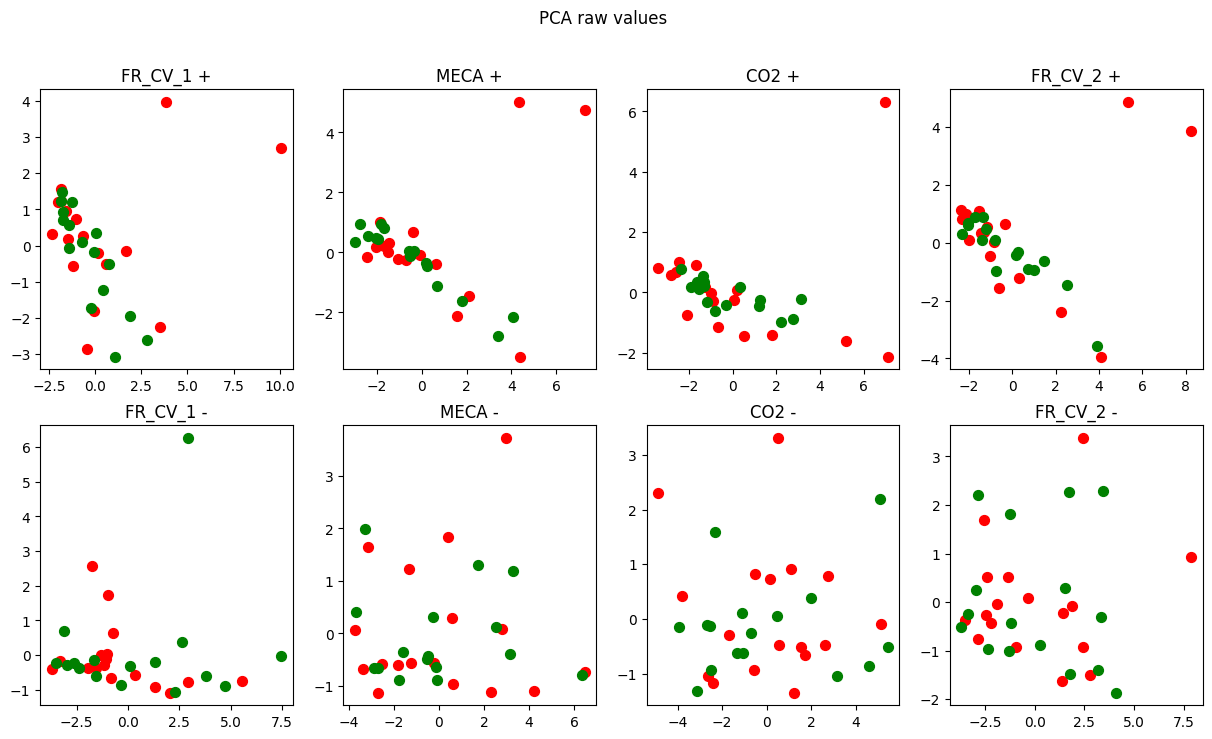

In [130]:
fig, axs = plt.subplots(ncols=len(conditions), nrows=len(['+', '-']))

for cond_i, cond in enumerate(conditions):

    for odor_i, odor in enumerate(['+', '-']):

        ax = axs[odor_i, cond_i]

        df_pca = df_pca_allcond.query(f"cond == '{cond}' and odor == '{odor}'")
        X = df_pca[metric_list].values
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2).fit_transform(X)
        df_pca_fit = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

        ax.set_title(f"{cond} {odor}")
        targets = ['select', 'non_select']
        colors = ['r', 'g']
        for target, color in zip(targets,colors):
            indicesToKeep = df_pca['select'] == target
            ax.scatter(df_pca_fit.loc[indicesToKeep.values, 'principal component 1']
                    , df_pca_fit.loc[indicesToKeep.values, 'principal component 2'], c = color, s = 50)

plt.suptitle('PCA raw values')
fig.set_figheight(8)
fig.set_figwidth(15)

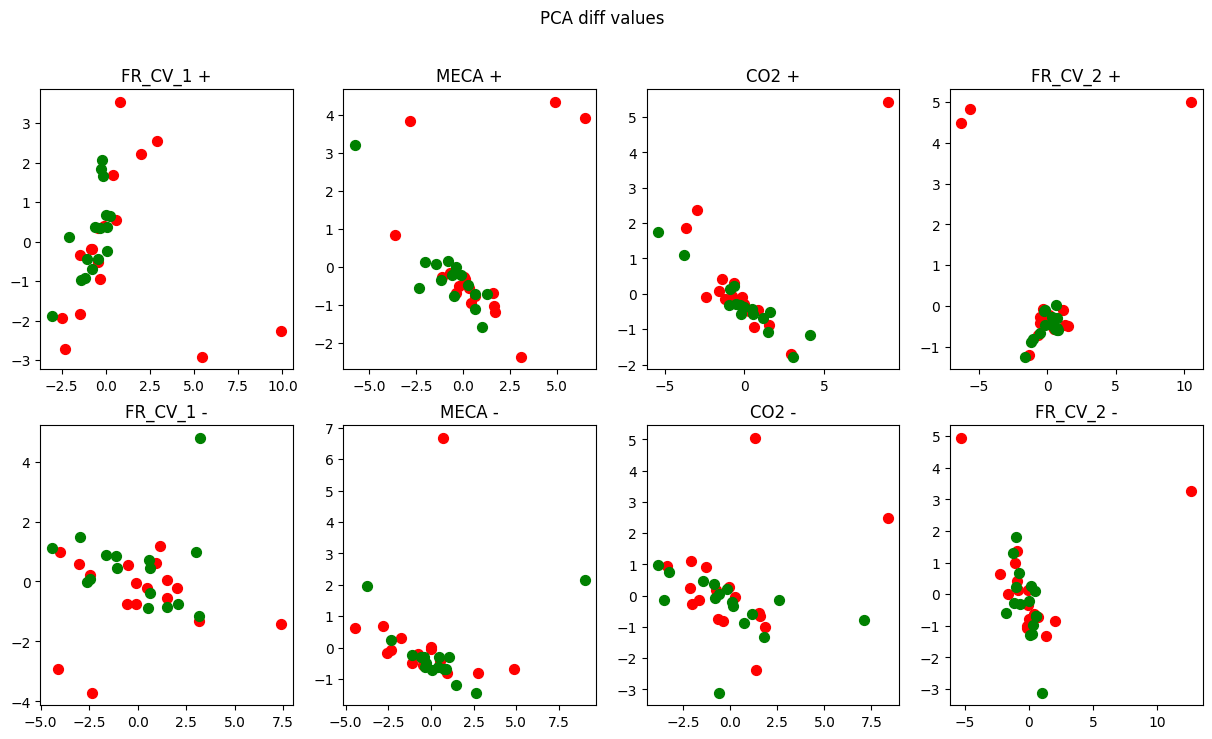

In [131]:
fig, axs = plt.subplots(ncols=len(conditions), nrows=len(['+', '-']))

for cond_i, cond in enumerate(conditions):

    for odor_i, odor in enumerate(['+', '-']):

        ax = axs[odor_i, cond_i]

        df_pca = df_pca_allcond_diff.query(f"cond == '{cond}' and odor == '{odor}'")
        X = df_pca[metric_list].values
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2).fit_transform(X)
        df_pca_fit = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

        ax.set_title(f"{cond} {odor}")
        targets = ['select', 'non_select']
        colors = ['r', 'g']
        for target, color in zip(targets,colors):
            indicesToKeep = df_pca['select'] == target
            ax.scatter(df_pca_fit.loc[indicesToKeep.values, 'principal component 1']
                    , df_pca_fit.loc[indicesToKeep.values, 'principal component 2'], c = color, s = 50)

plt.suptitle('PCA diff values')
fig.set_figheight(8)
fig.set_figwidth(15)

# ON GOOD SUBJECTS

In [43]:
sujet_best = ['BD12', 'CM32', 'DI22', 'FA11', 'GM16', 'HJ31', 'JR17', 'MA33',
       'MJ02', 'MN26', 'PD01', 'SC29', 'TA09', 'TJ24', 'TM19', 'VN03',
       'ZV21']

## cond

['o', '+', '-']


/home/jules.granget/myenvs/py39c/lib64/python3.9/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome]

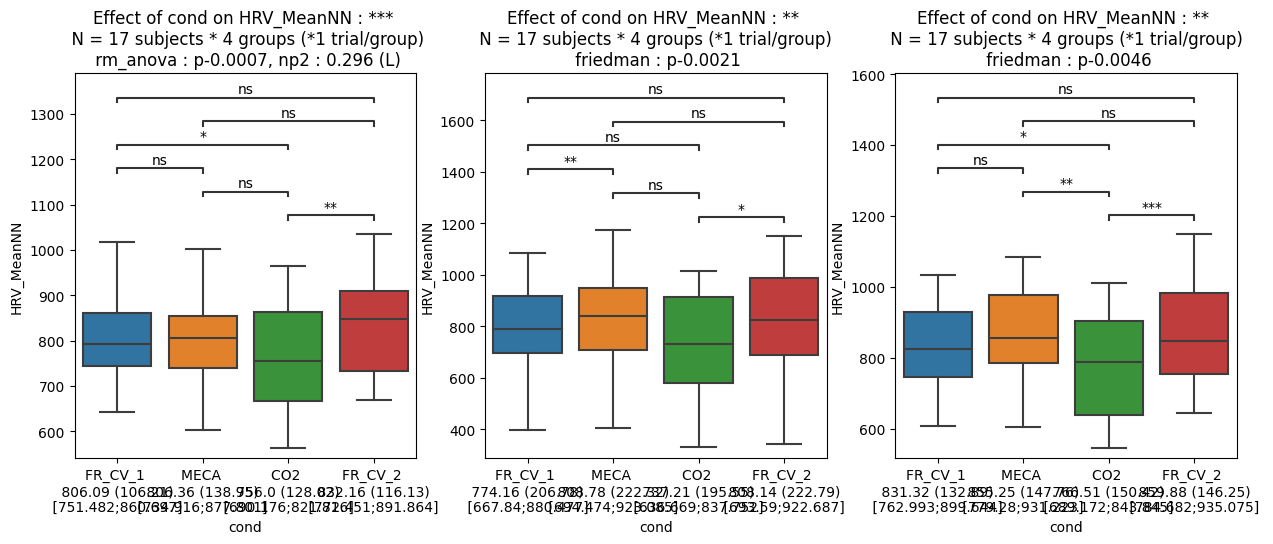

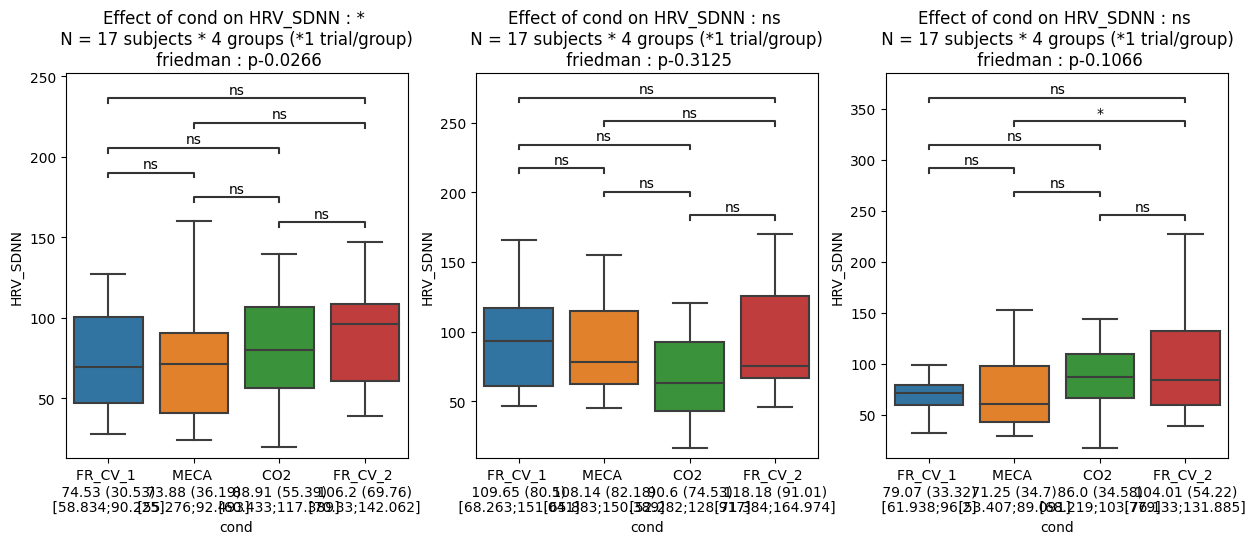

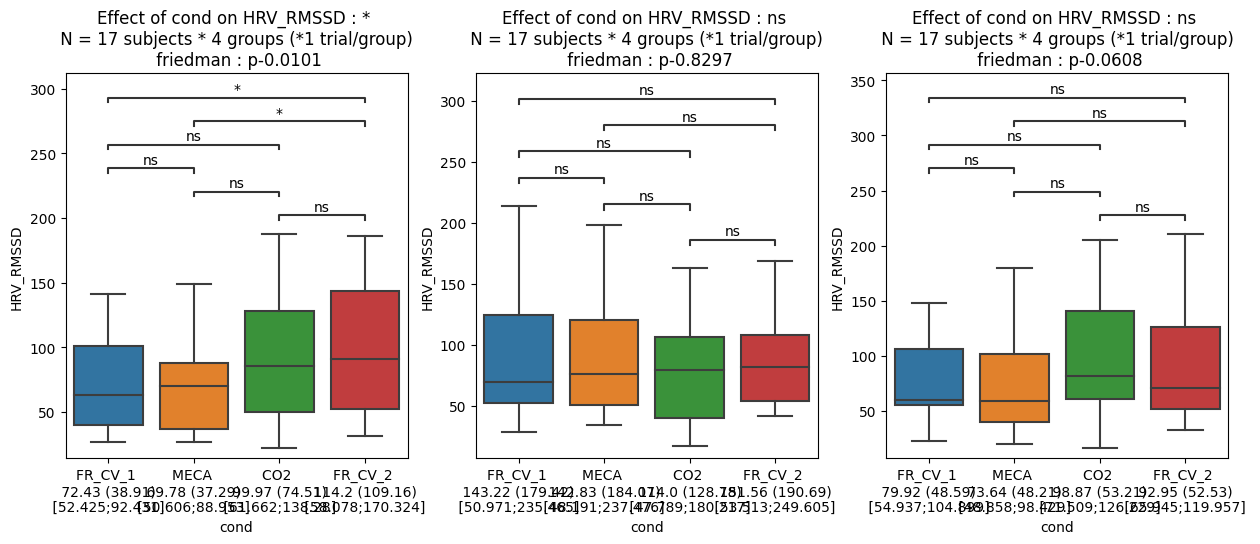

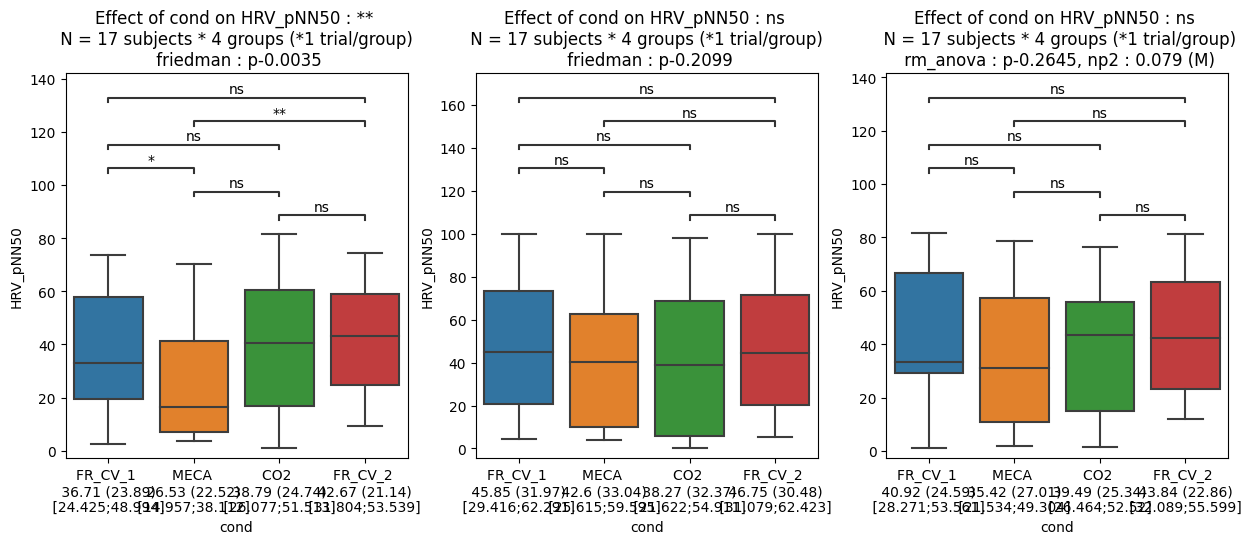

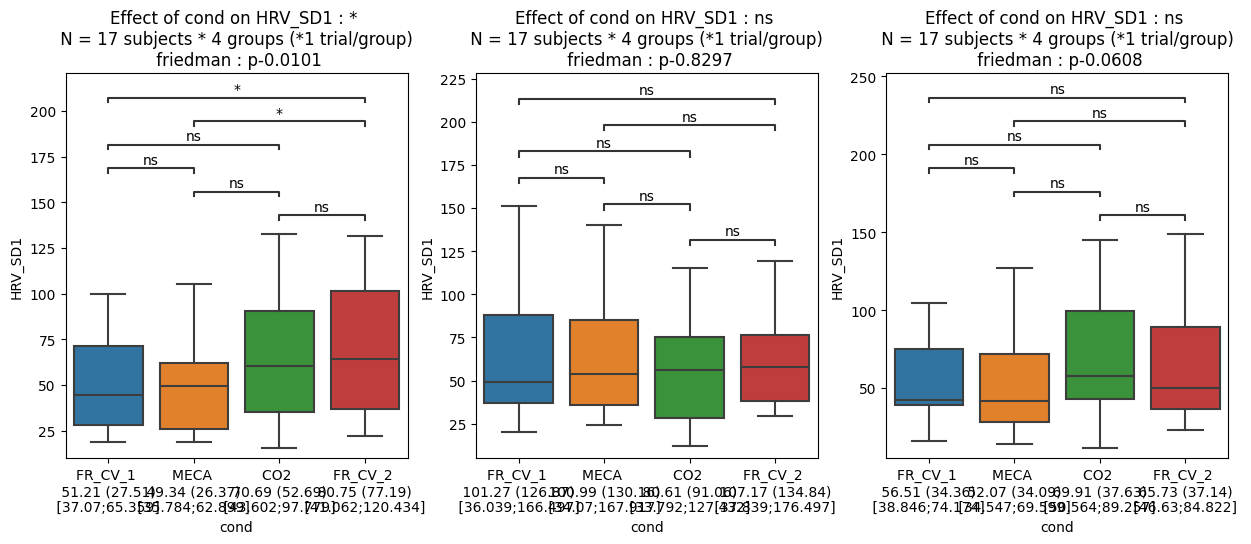

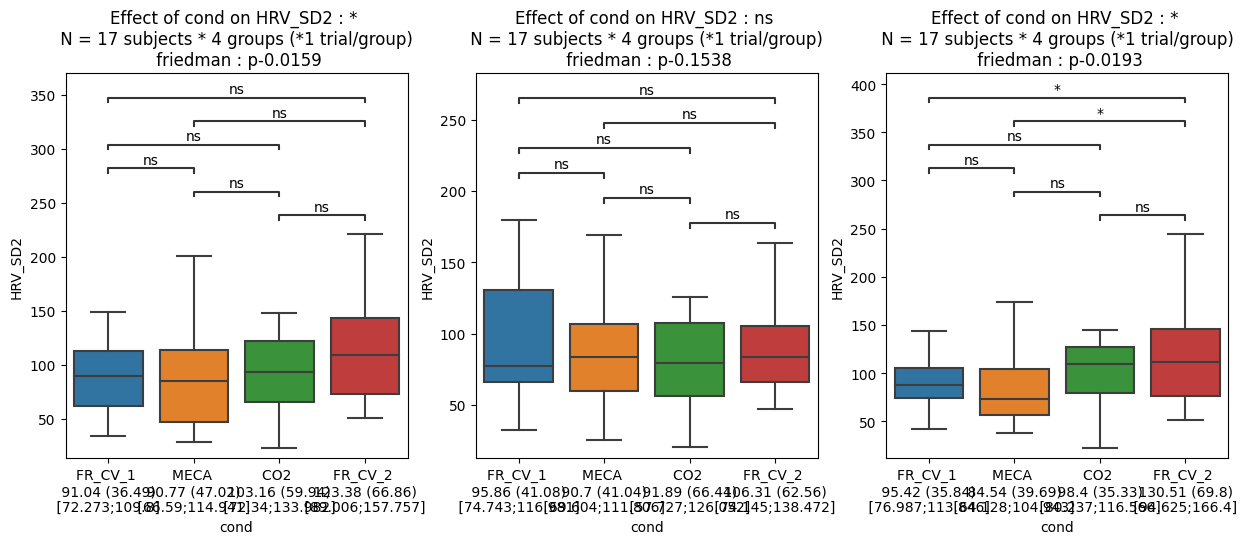

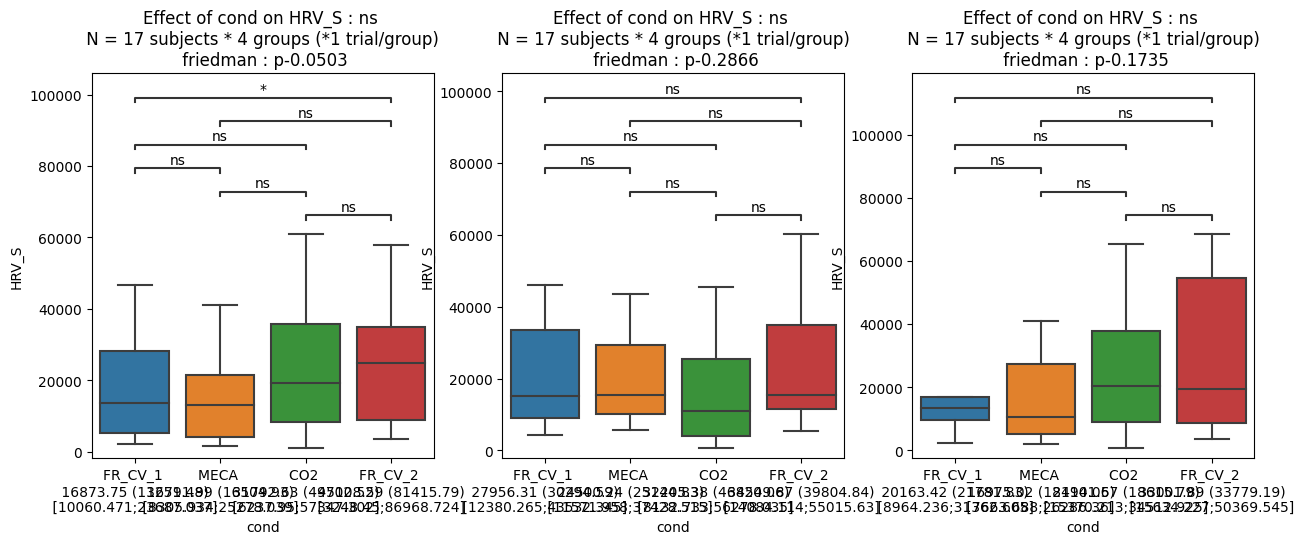

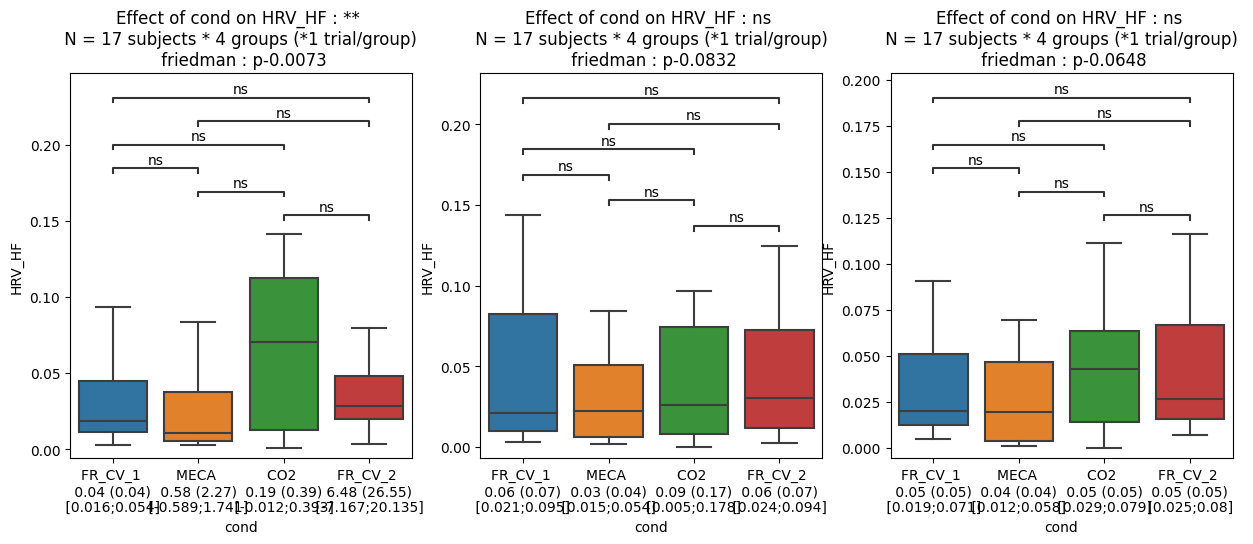

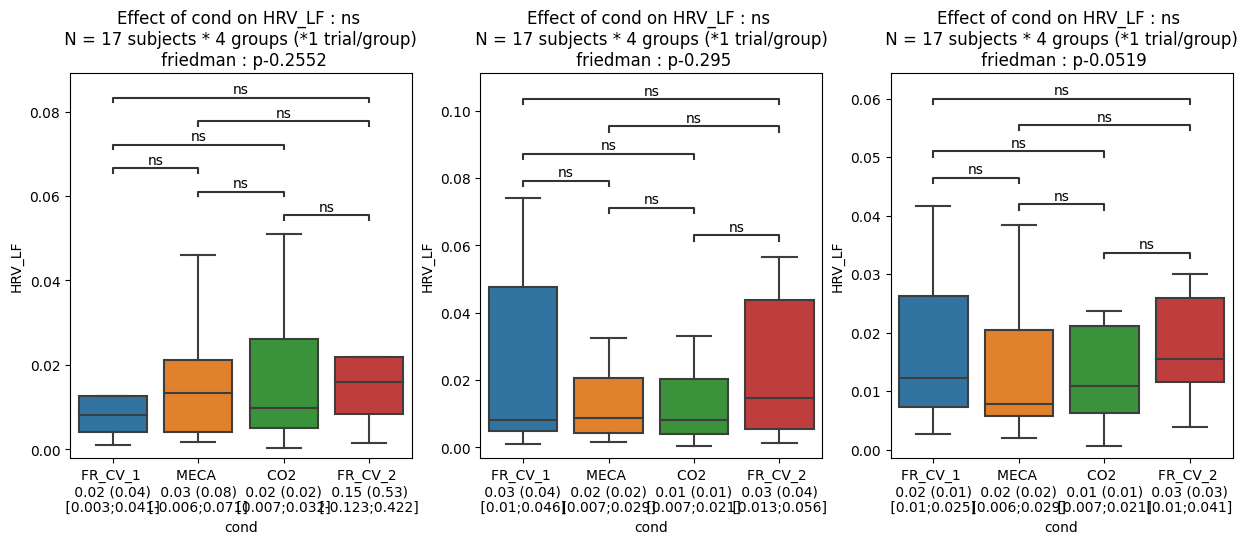

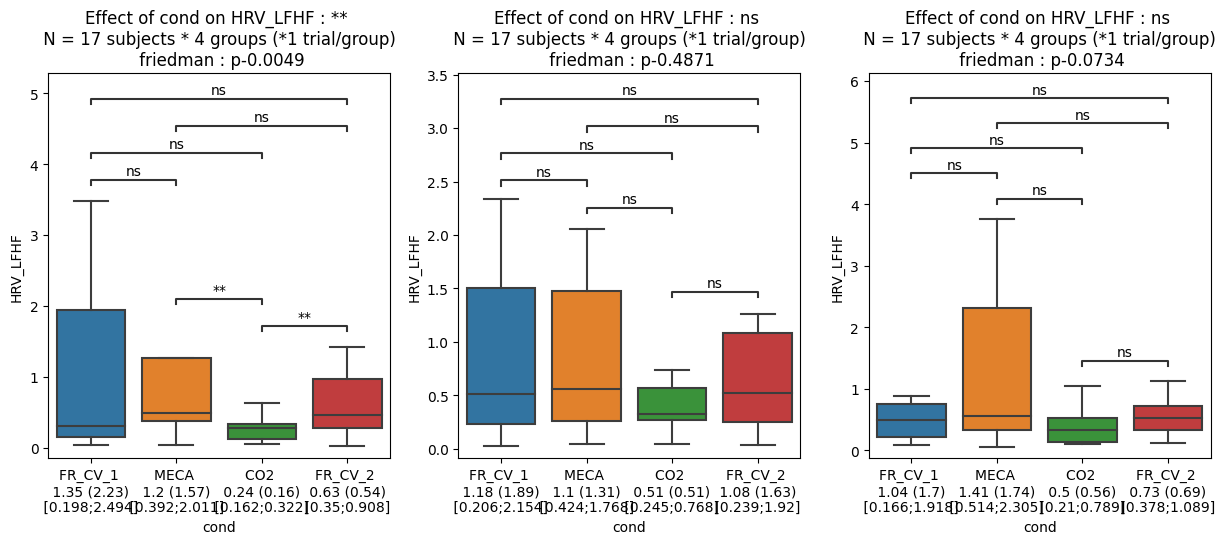

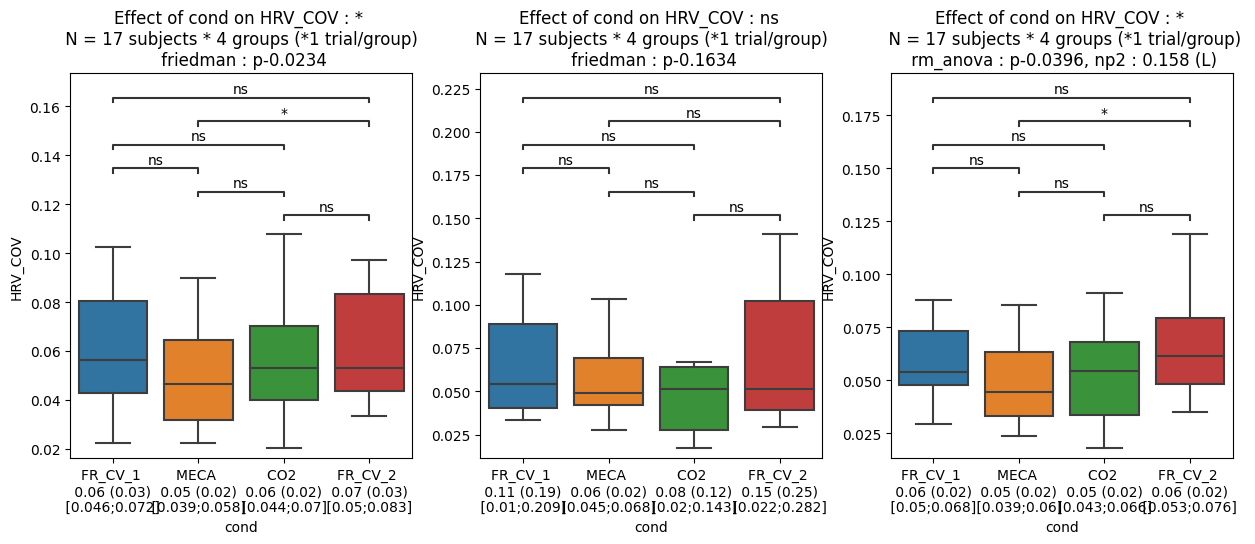

In [44]:
predictor = 'cond' 

print(odor_list)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, odor_i in enumerate(odor_list):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"odor == '{odor_i}' & sujet in {sujet_best}")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

## odor

/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

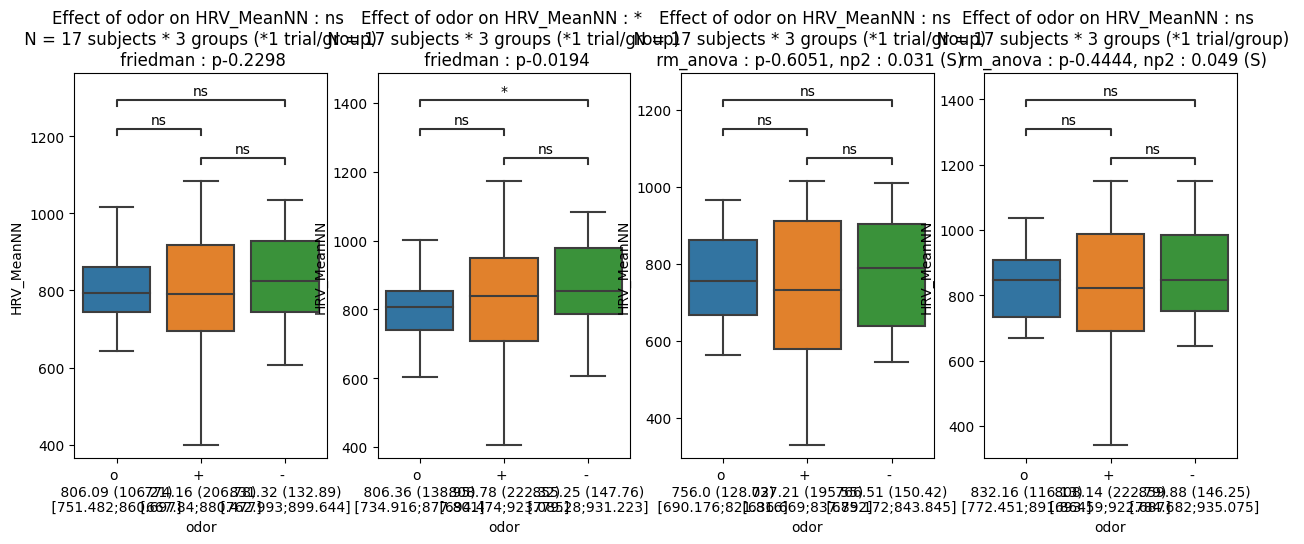

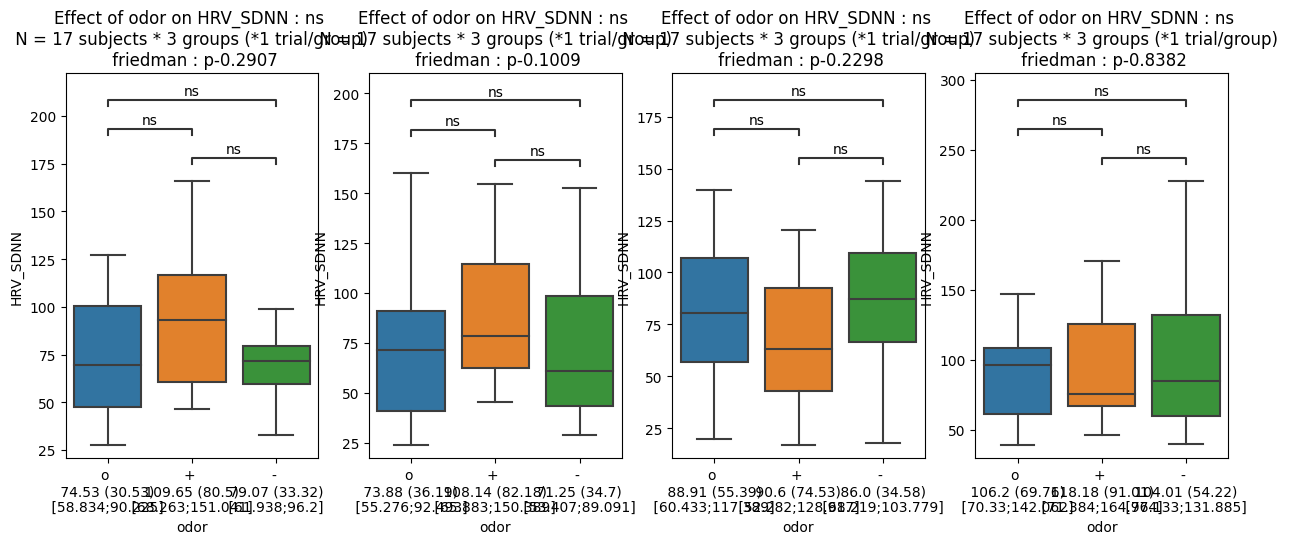

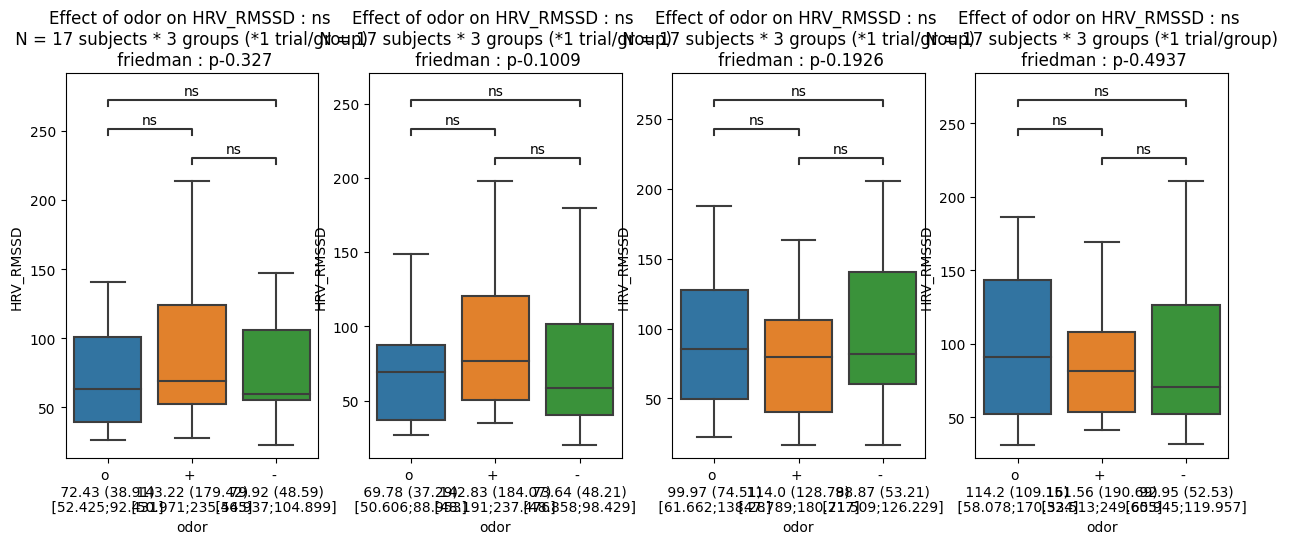

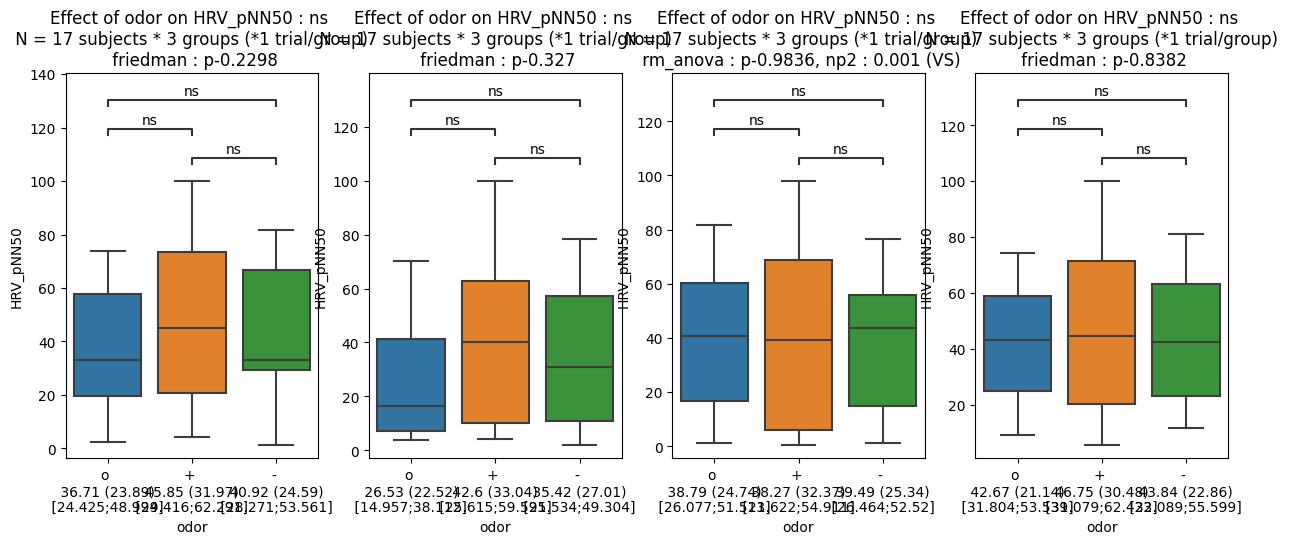

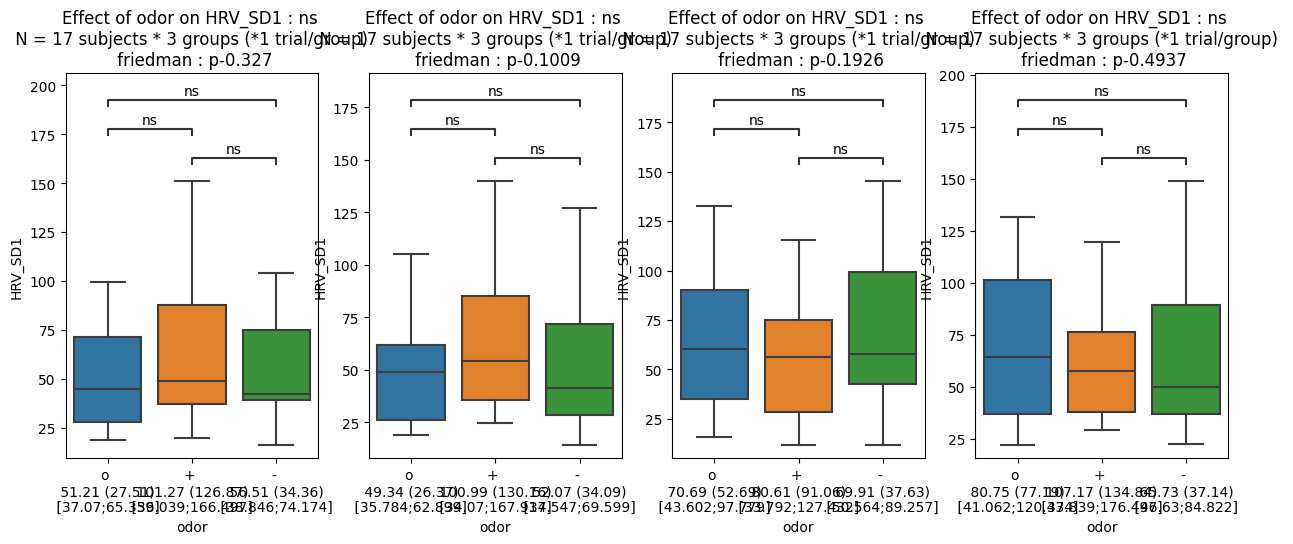

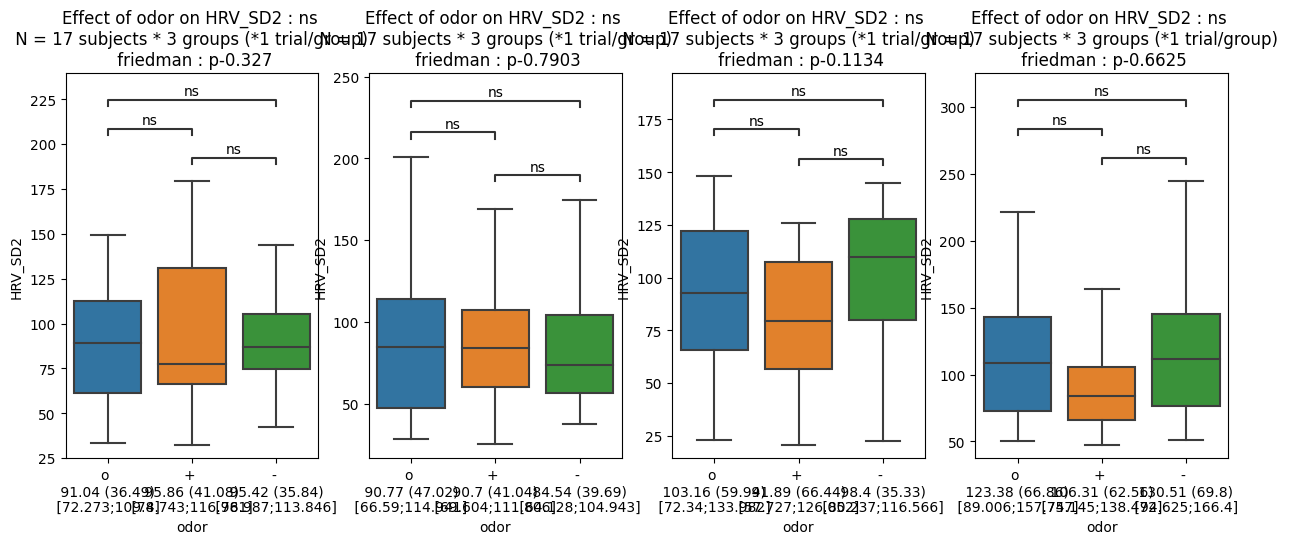

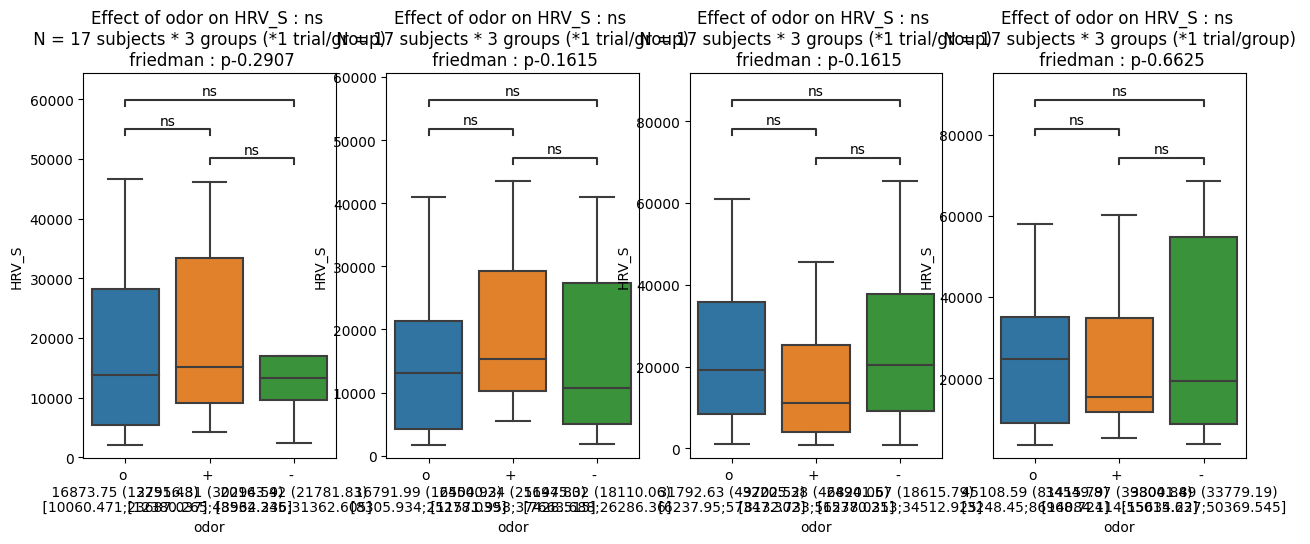

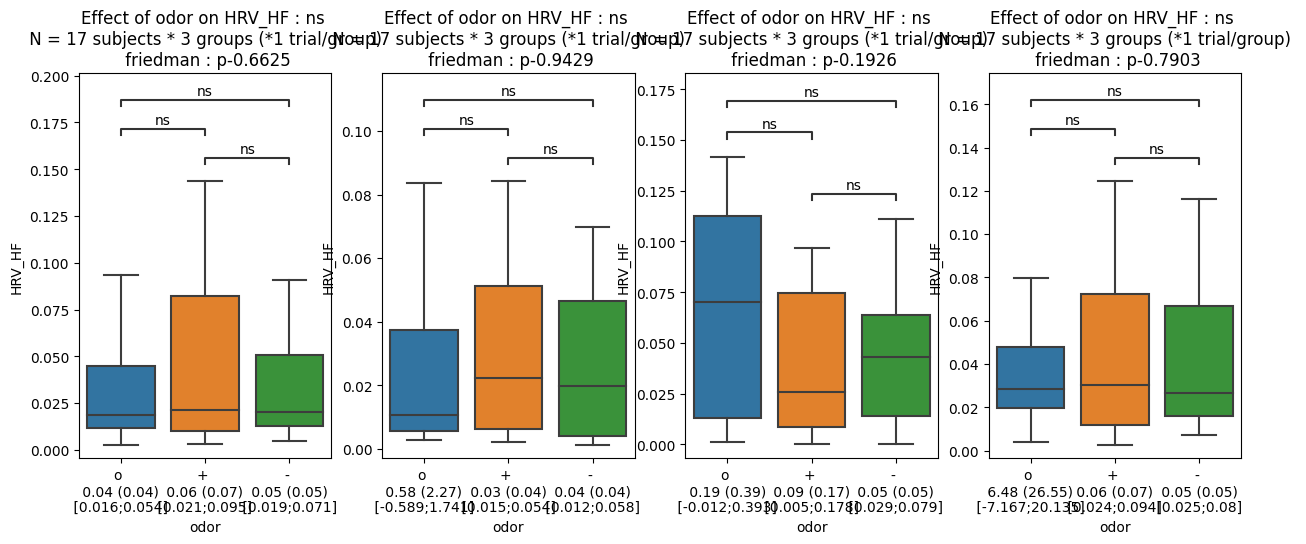

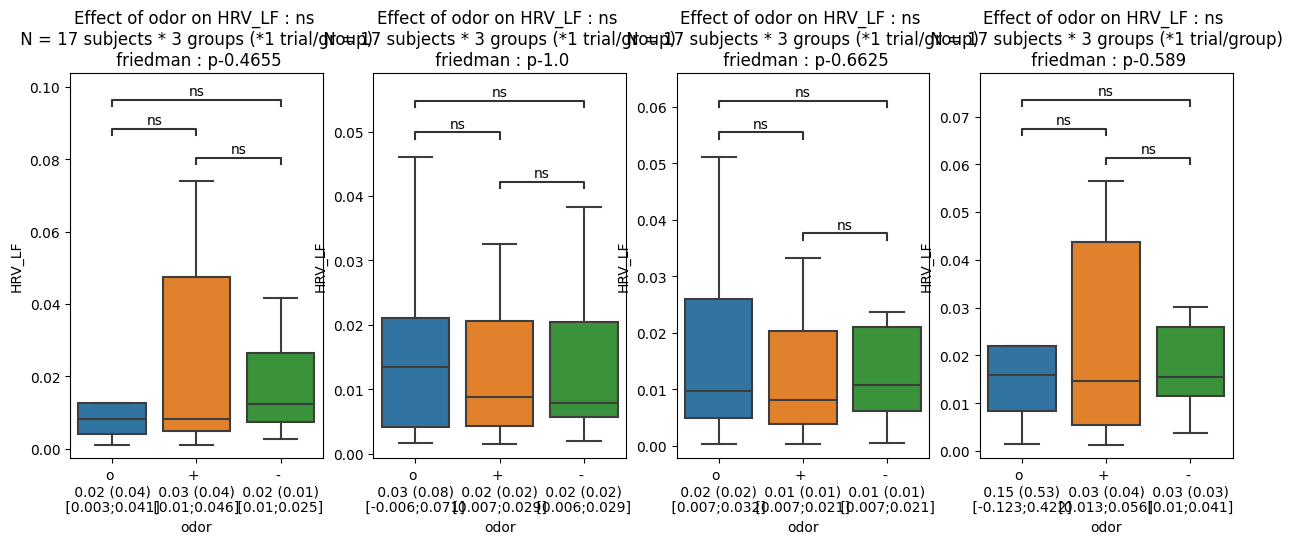

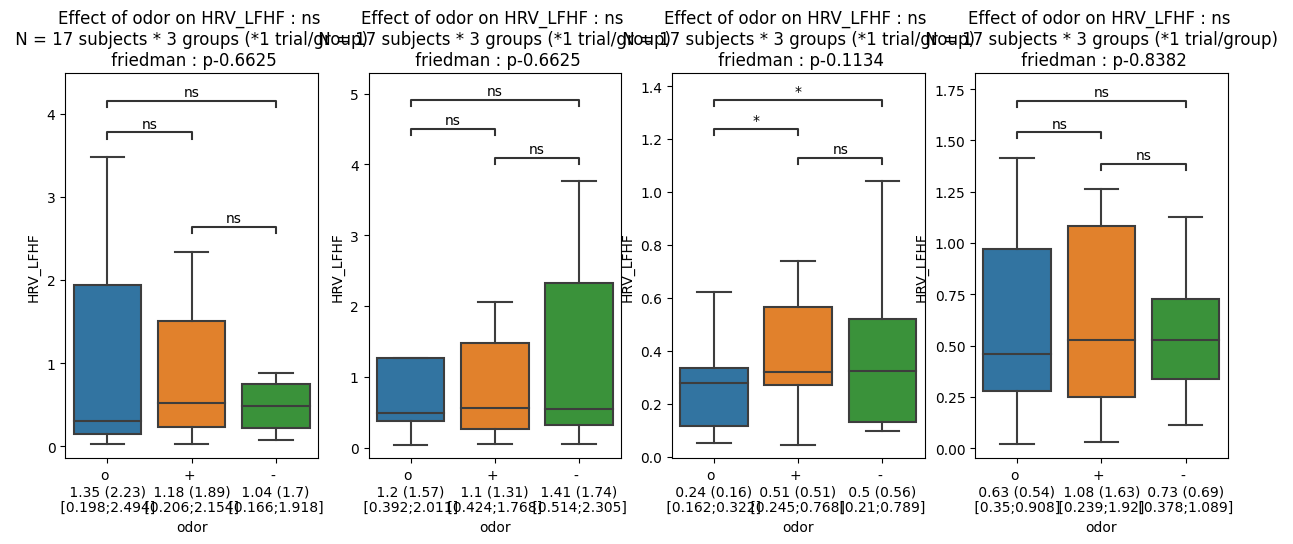

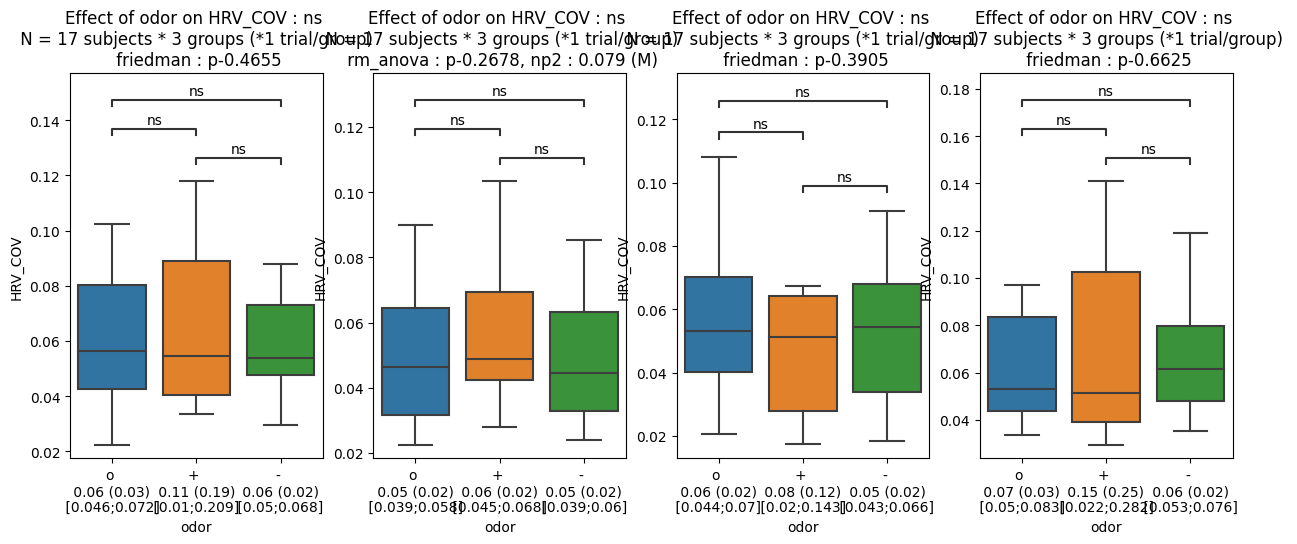

In [45]:
predictor = 'odor' 

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"cond == '{cond}' & sujet in {sujet_best}")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

# DIFF ALL SUJET

## cond

['+', '-']


/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

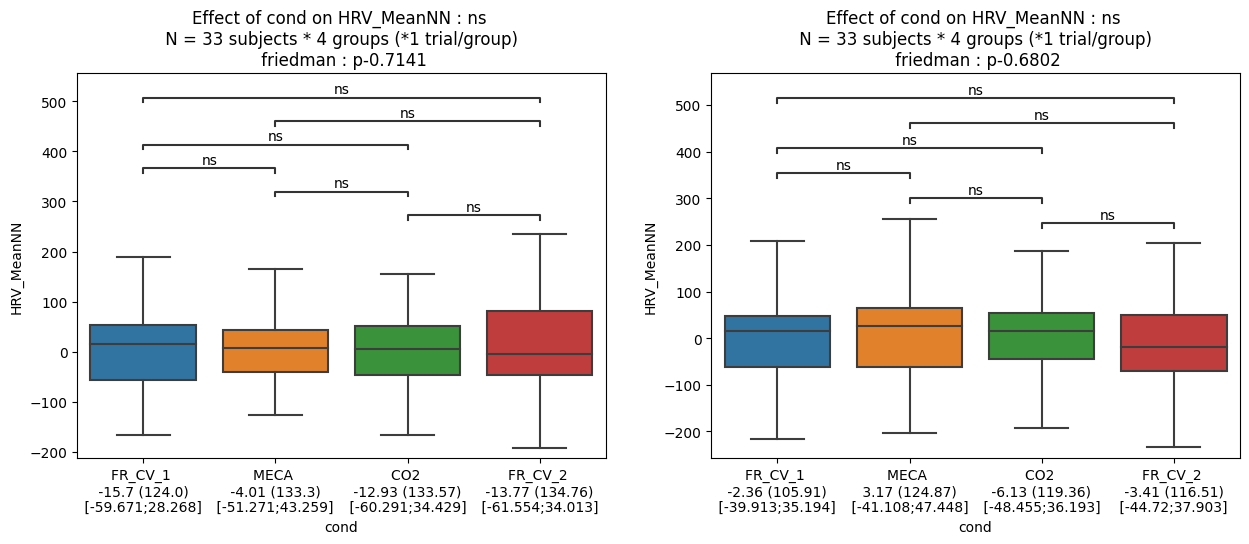

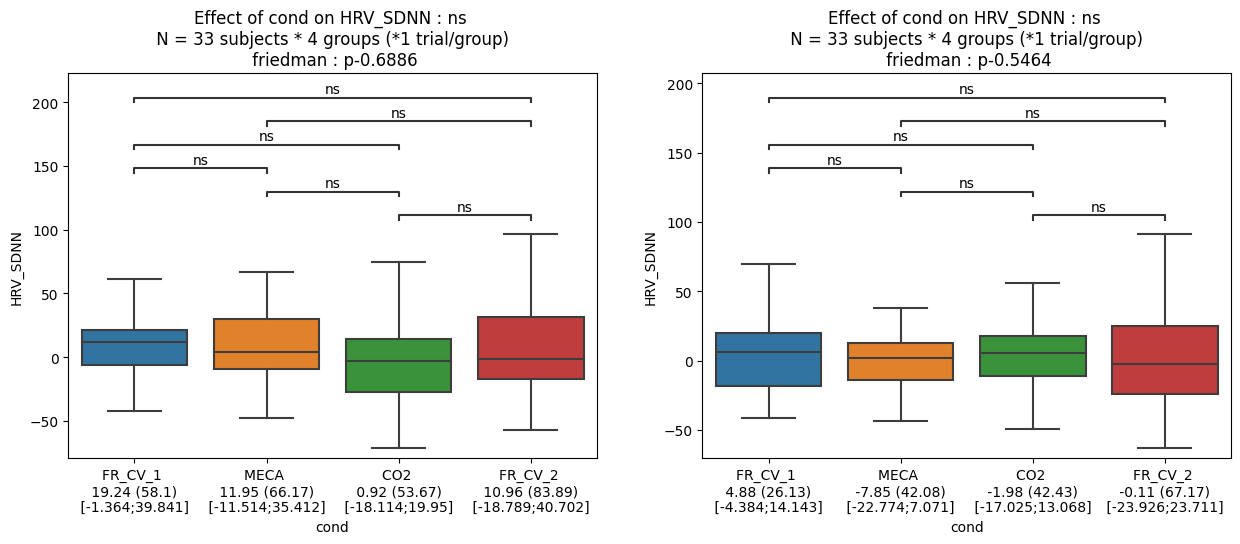

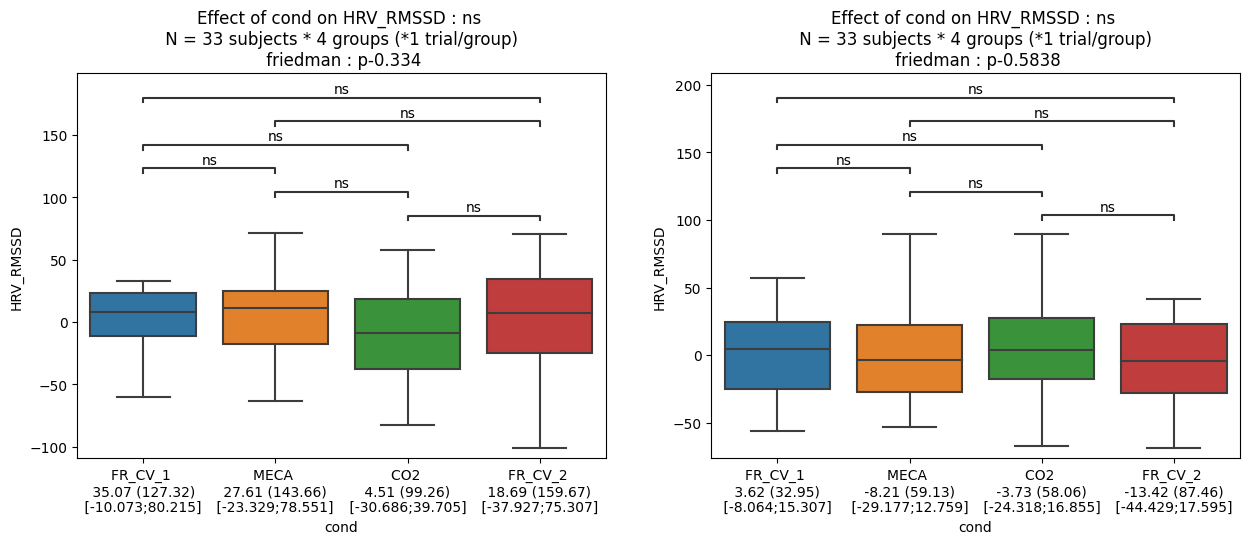

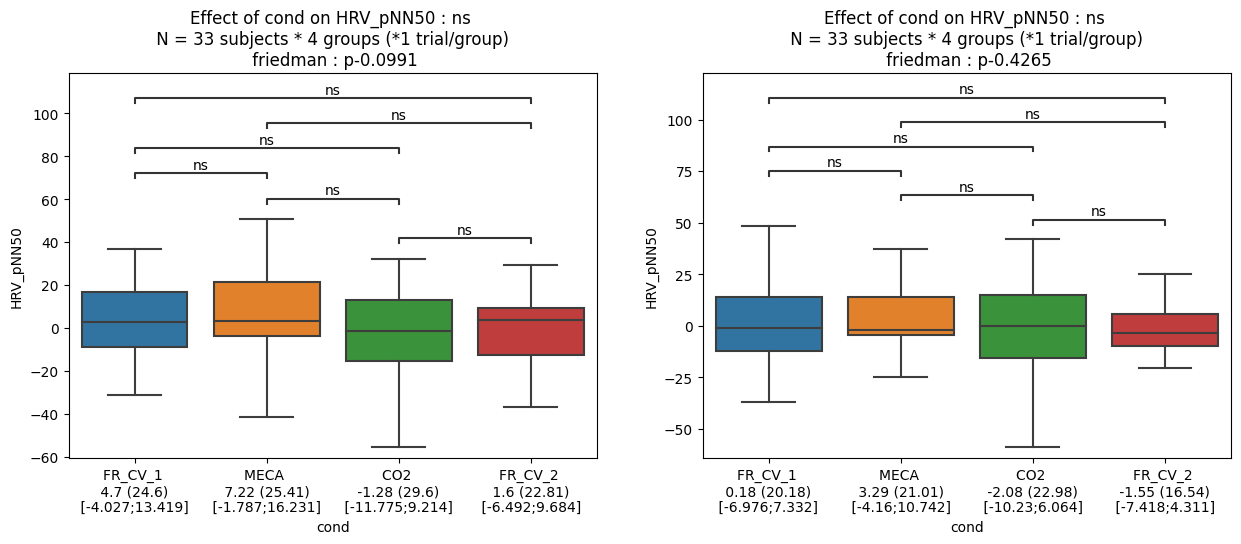

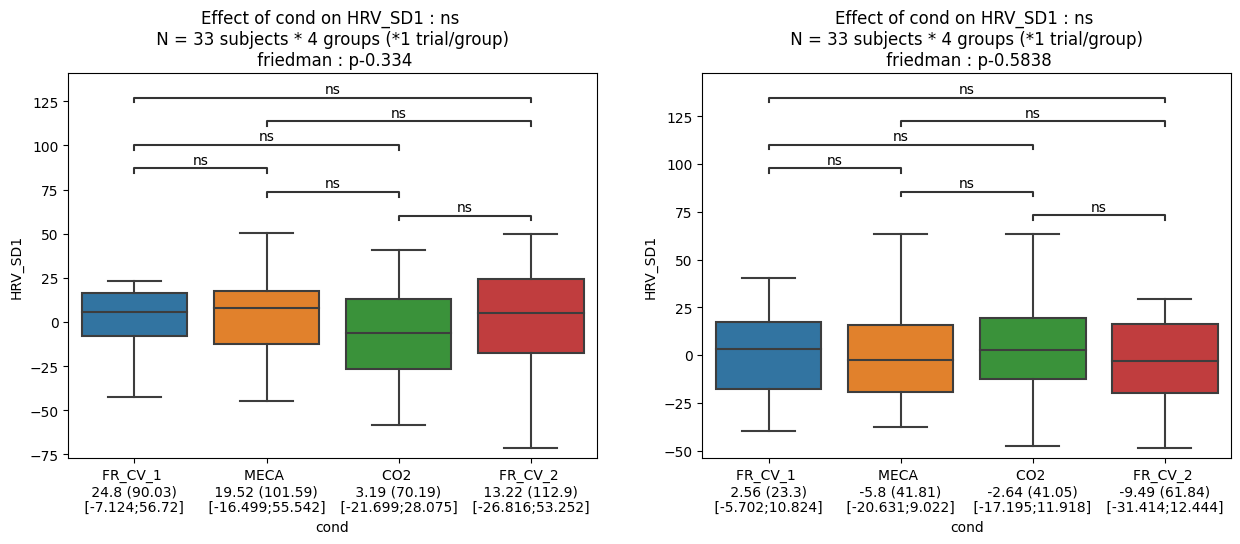

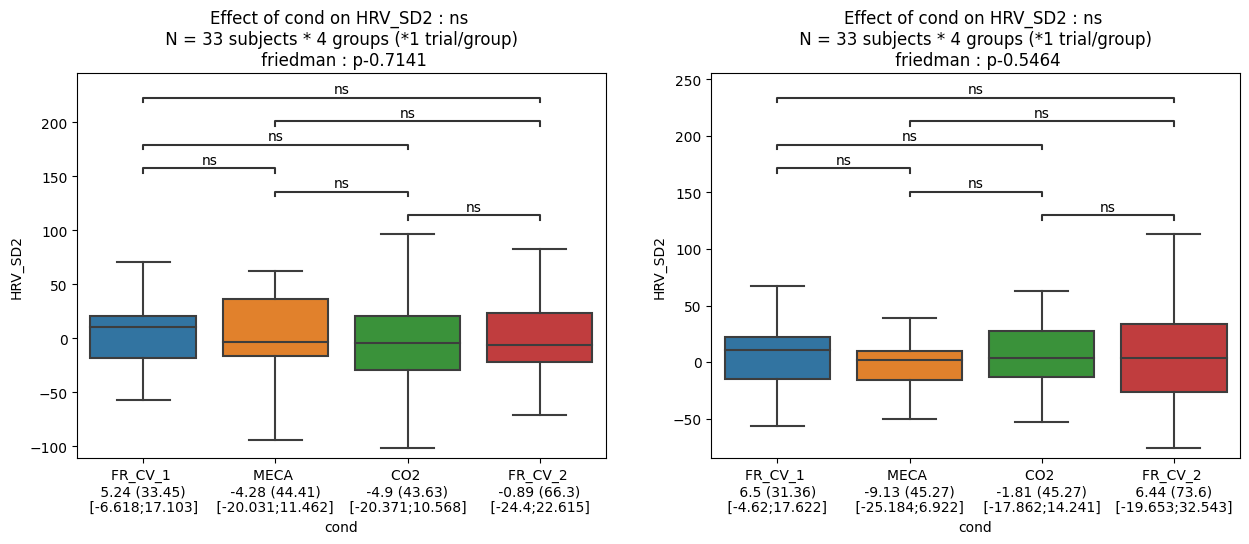

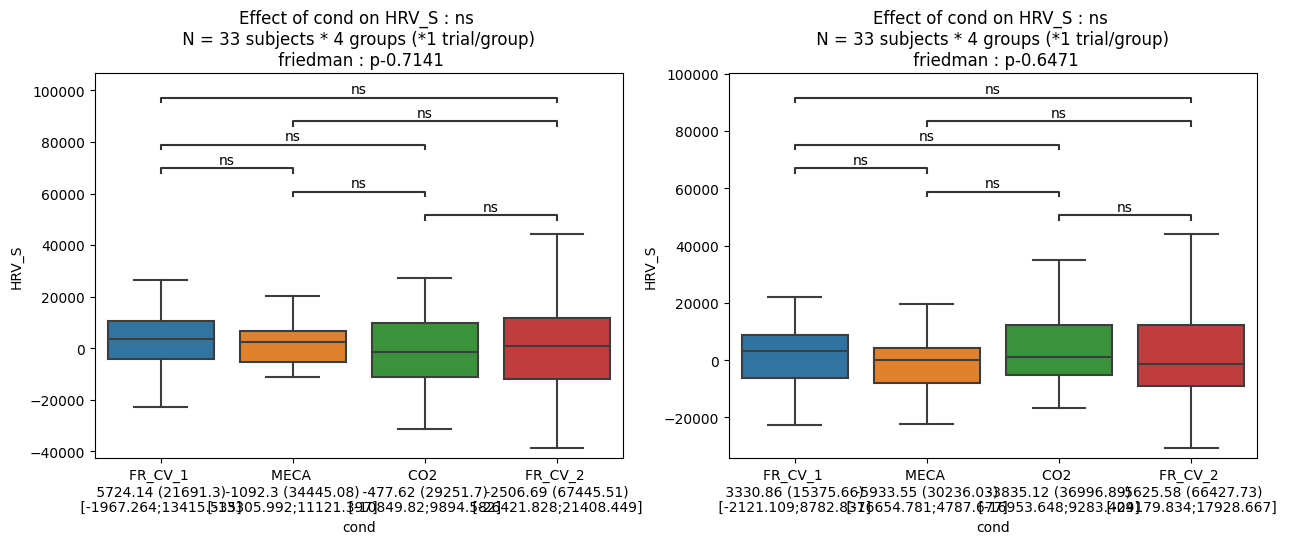

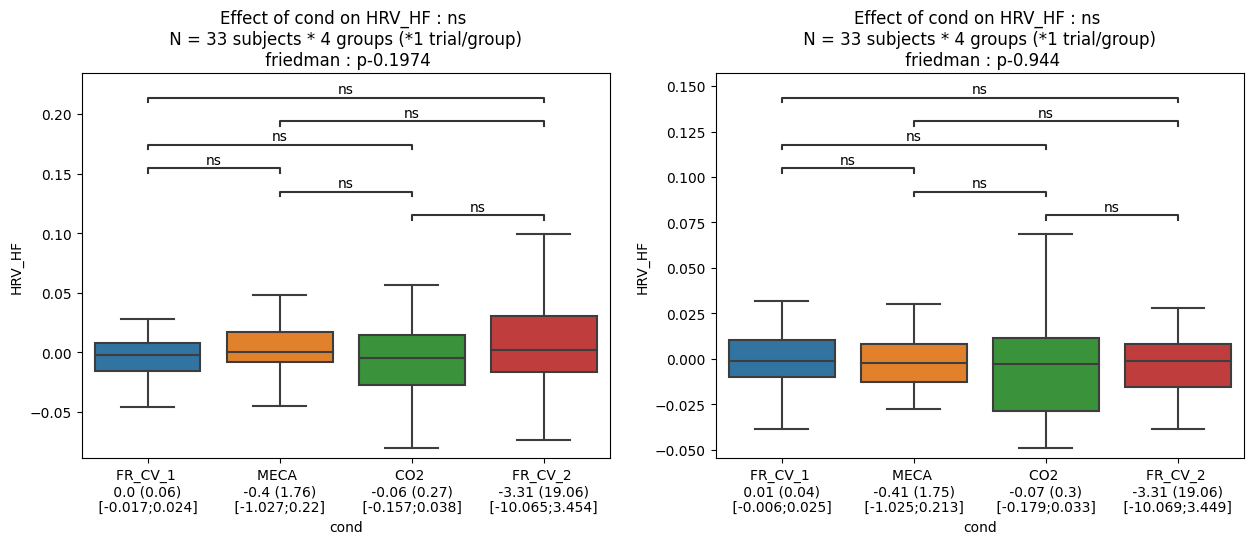

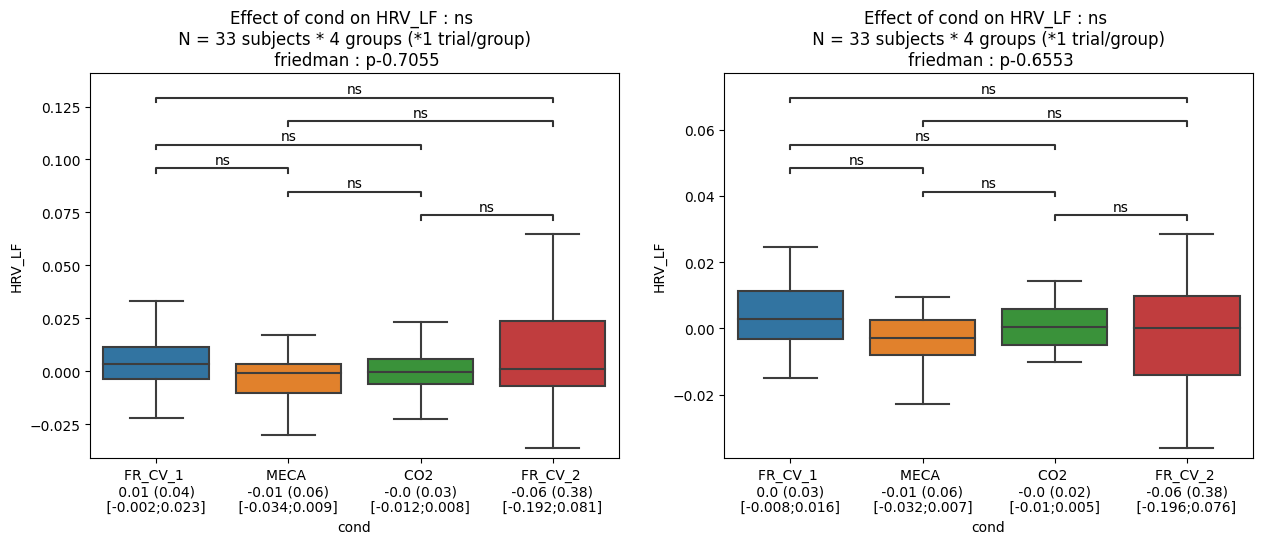

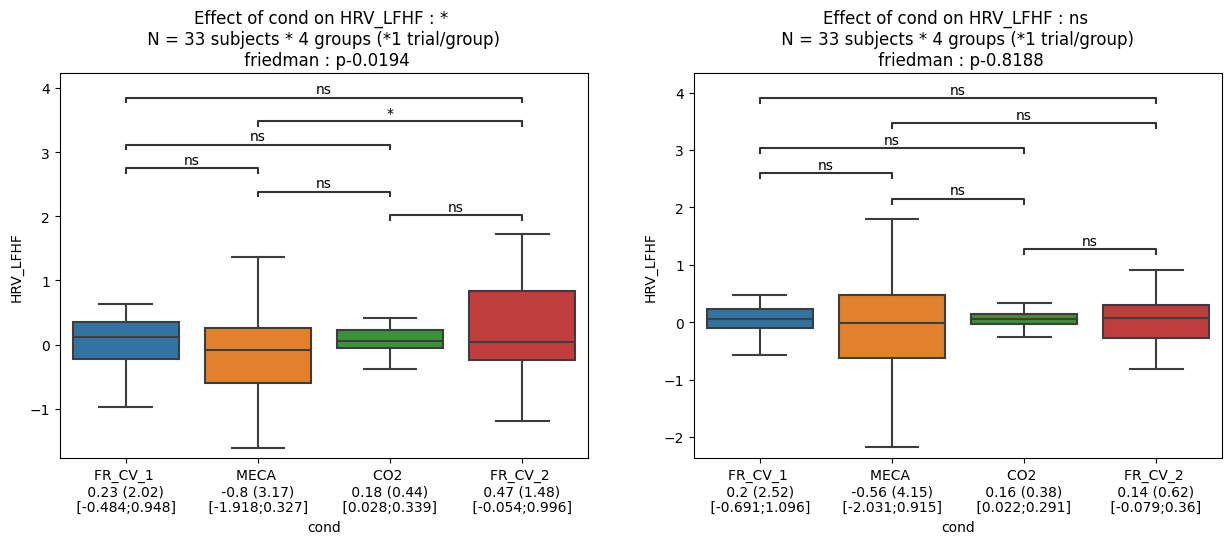

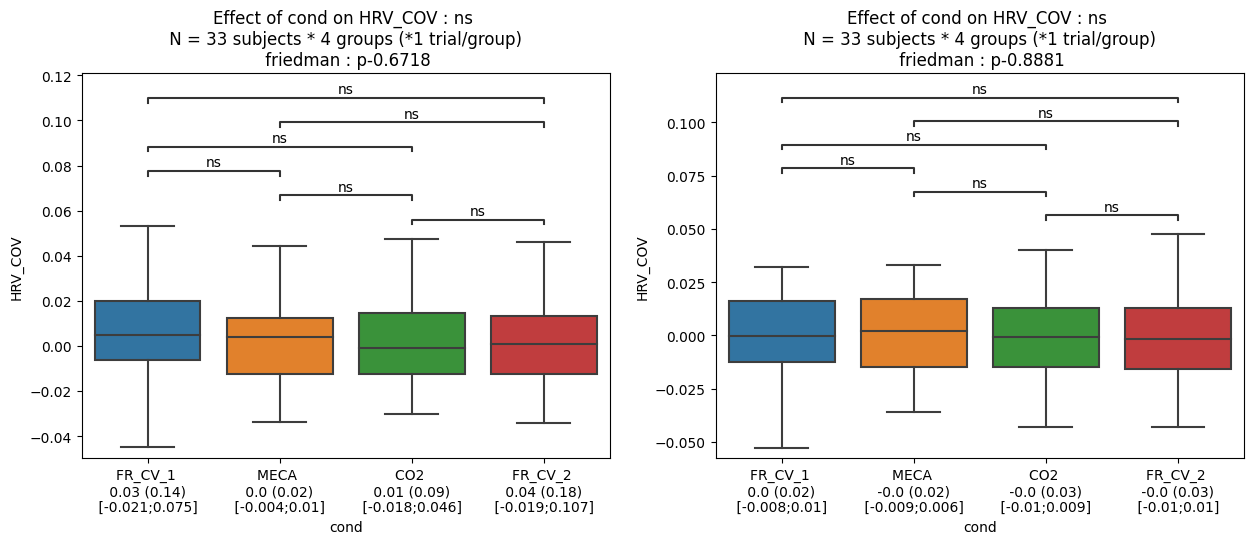

In [72]:
predictor = 'cond' 

odor_list_diff = ['+', '-'] 
print(odor_list_diff)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=len(odor_list_diff))
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, odor_i in enumerate(odor_list_diff):
        
        ax = axs[c]
        df_stats = df_diff_hrv.query(f"odor == '{odor_i}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)


## odor

/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

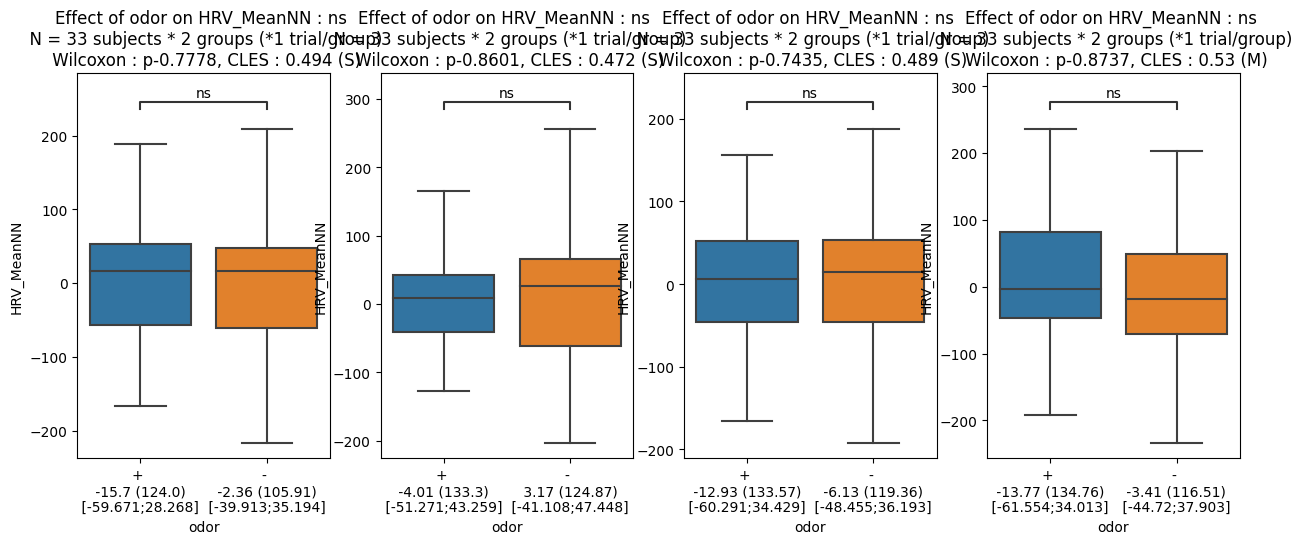

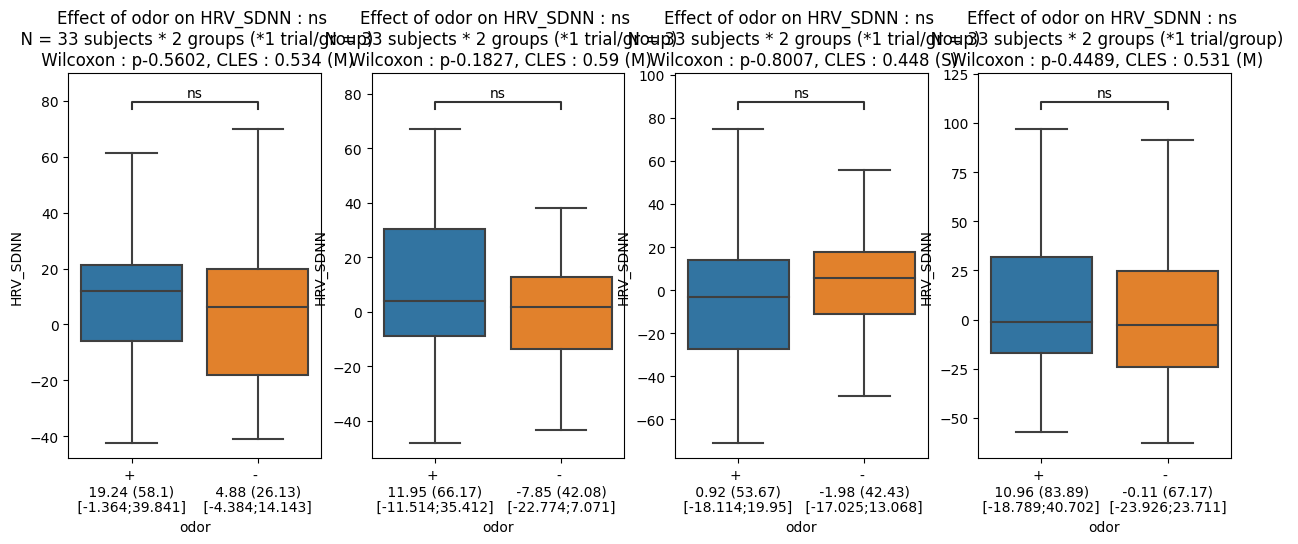

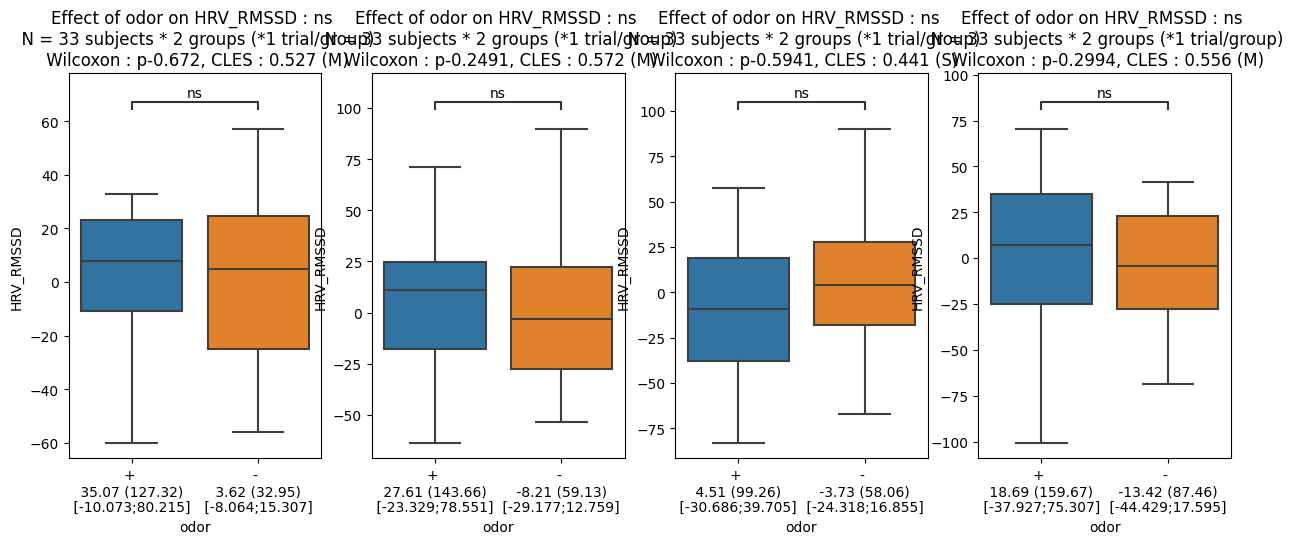

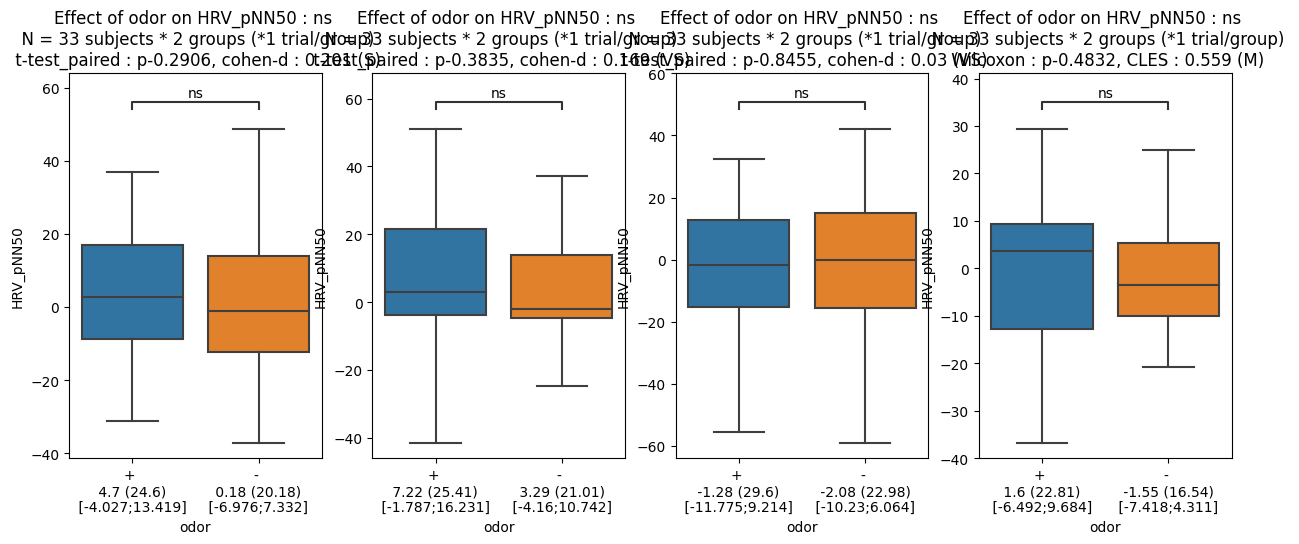

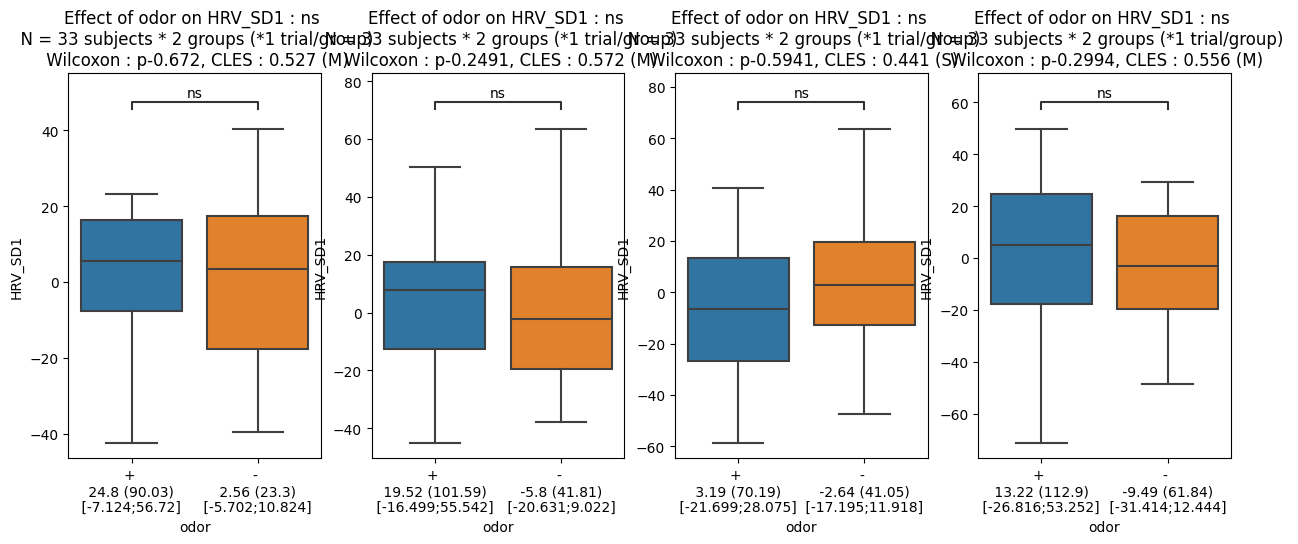

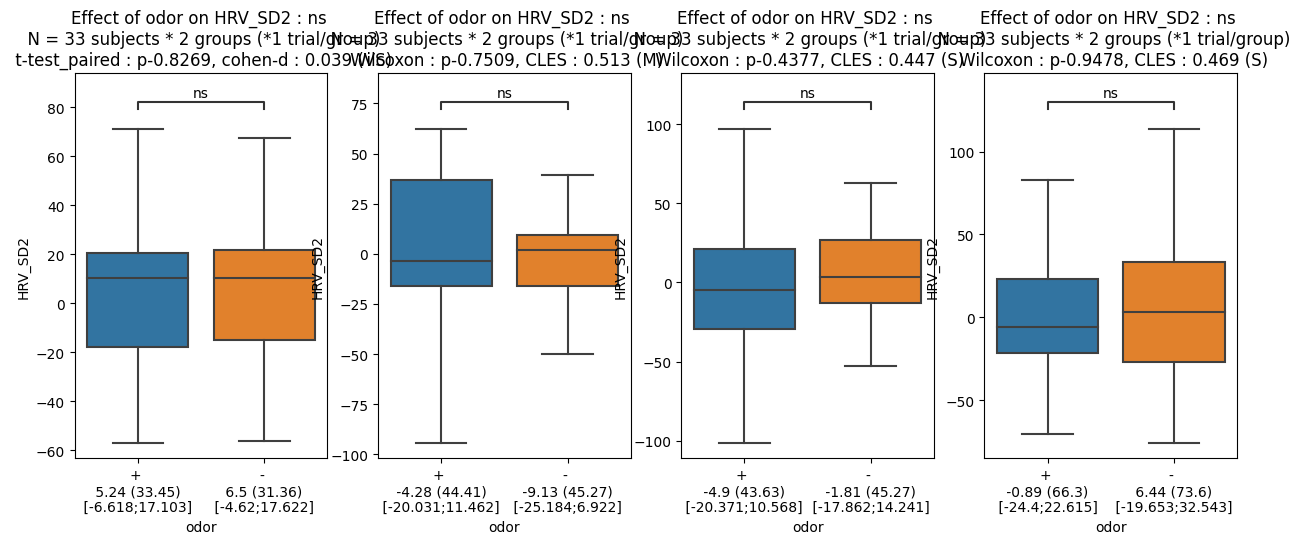

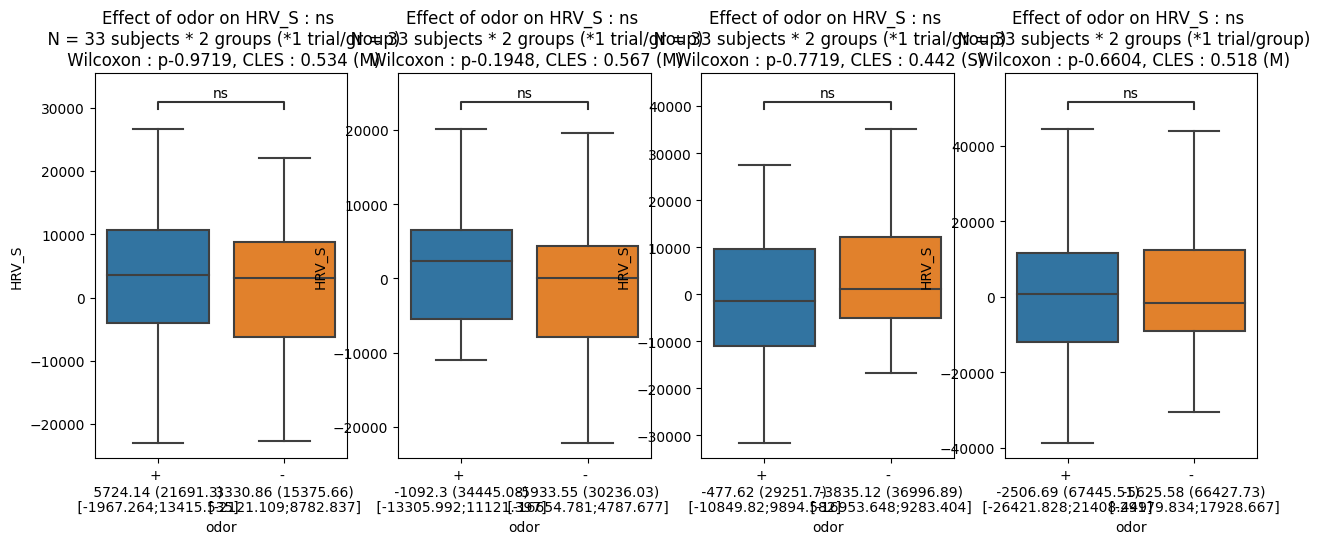

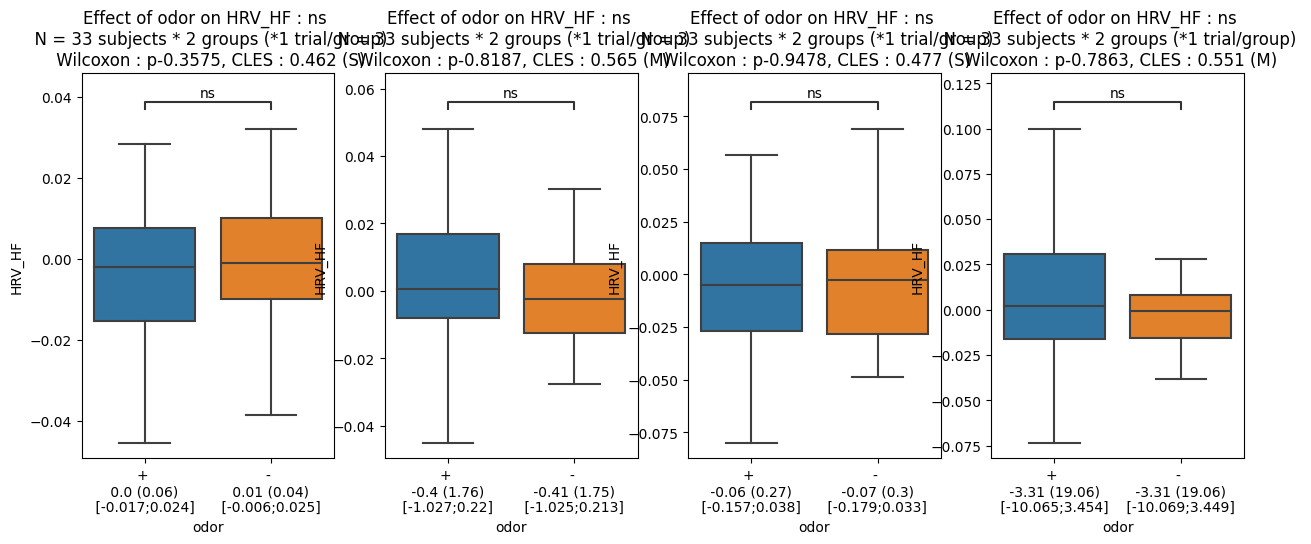

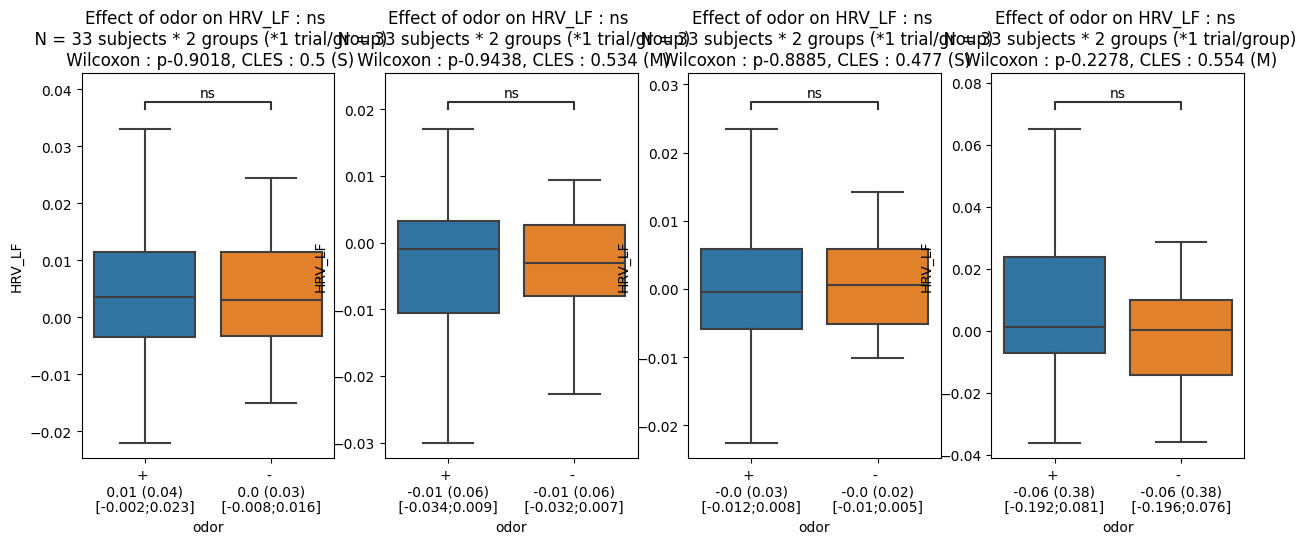

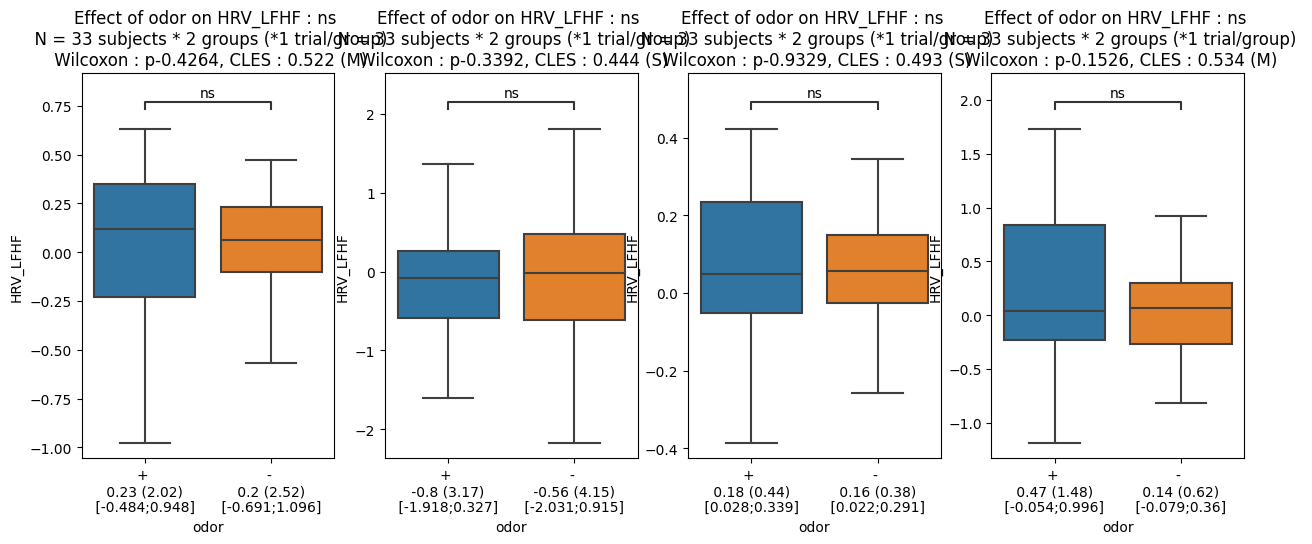

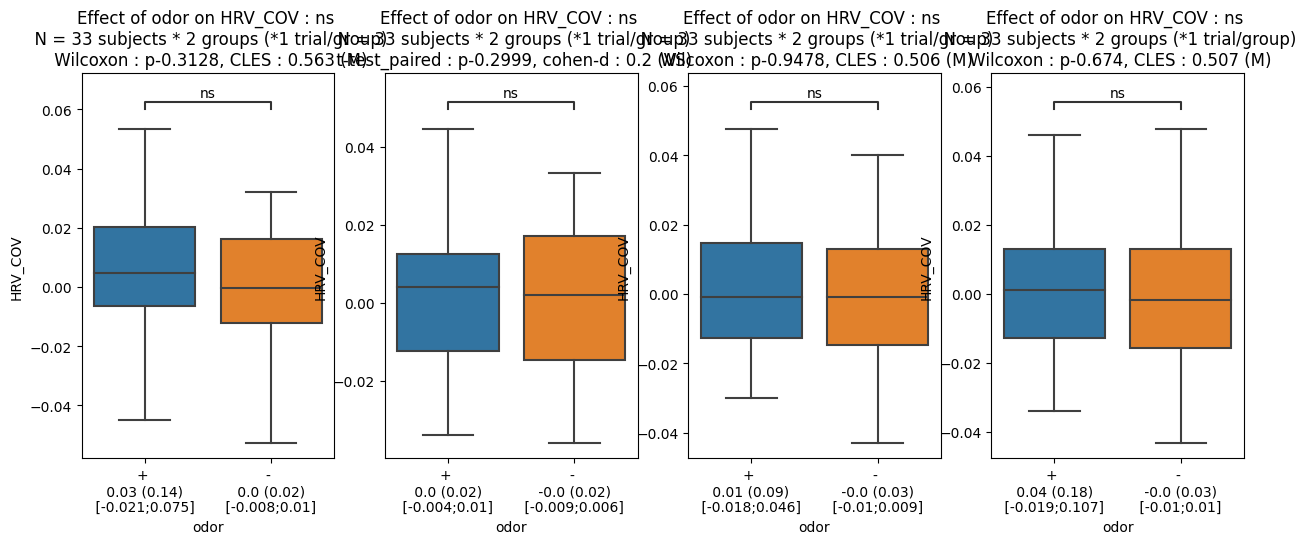

In [76]:
predictor = 'odor' 

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_diff_hrv.query(f"cond == '{cond}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

# DIFF BEST SUJET

## cond

['+', '-']


/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

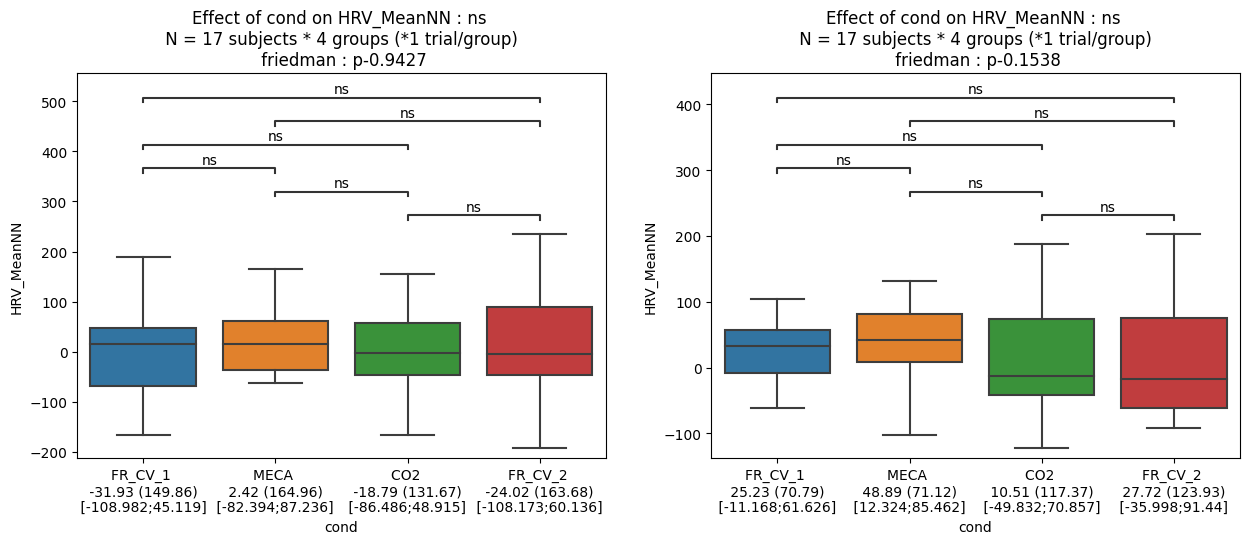

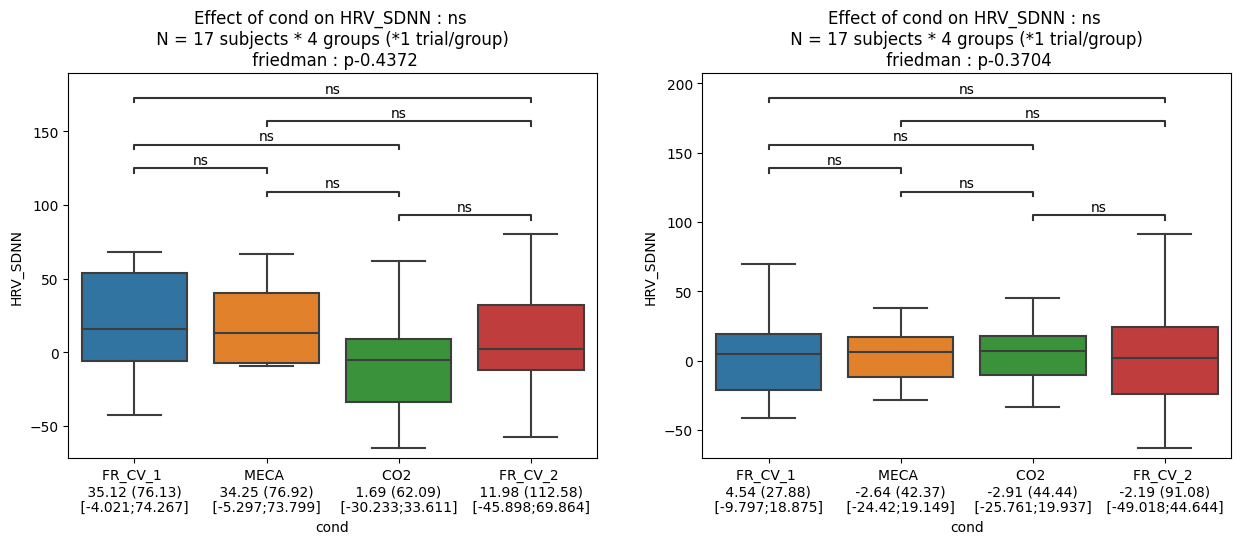

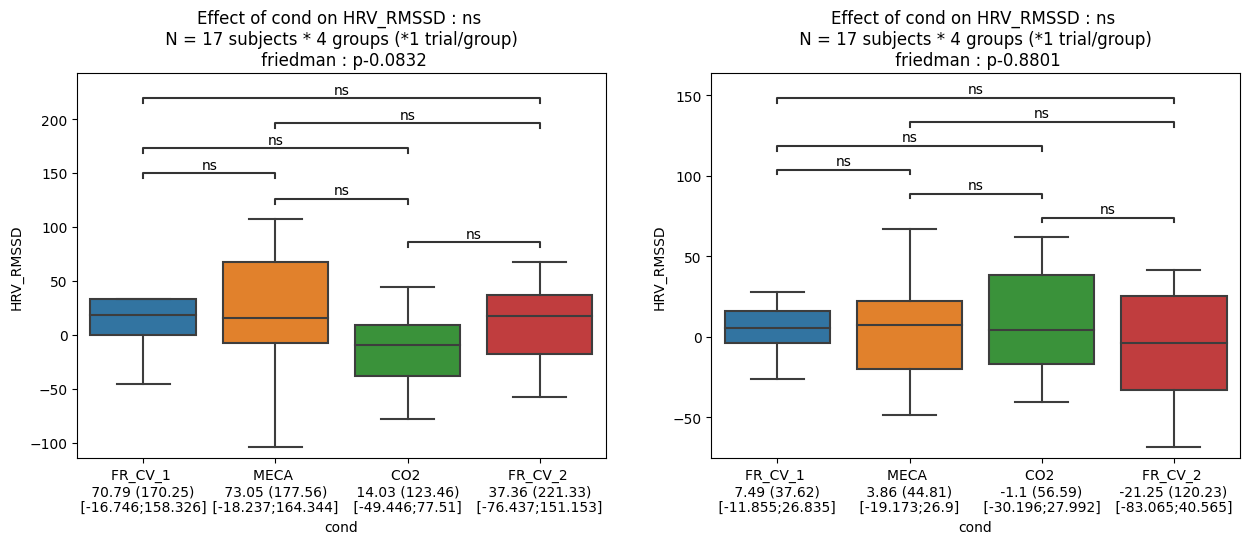

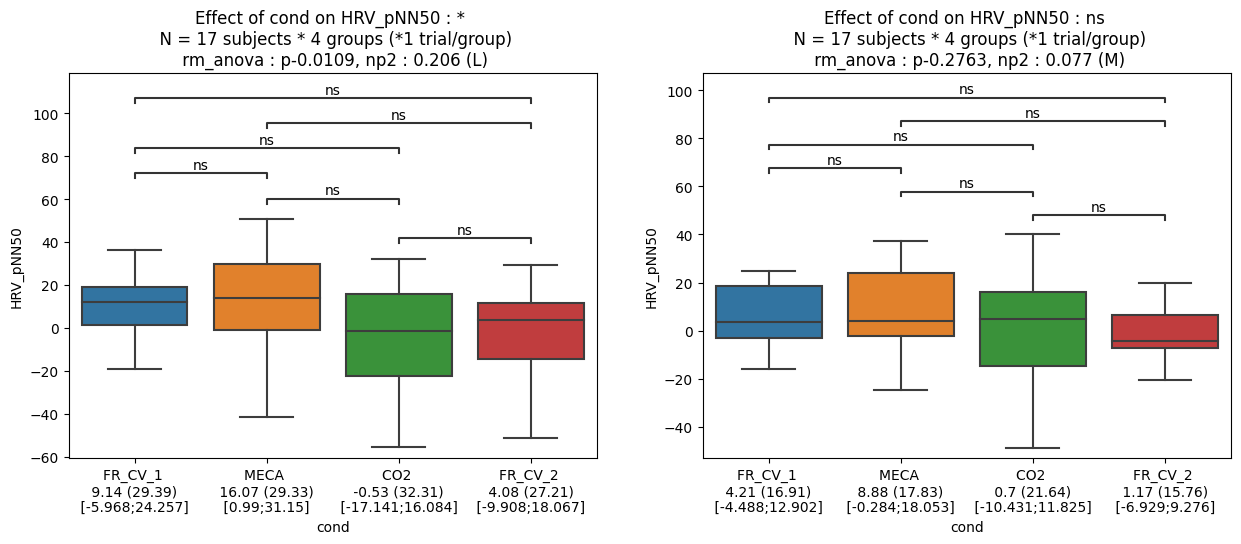

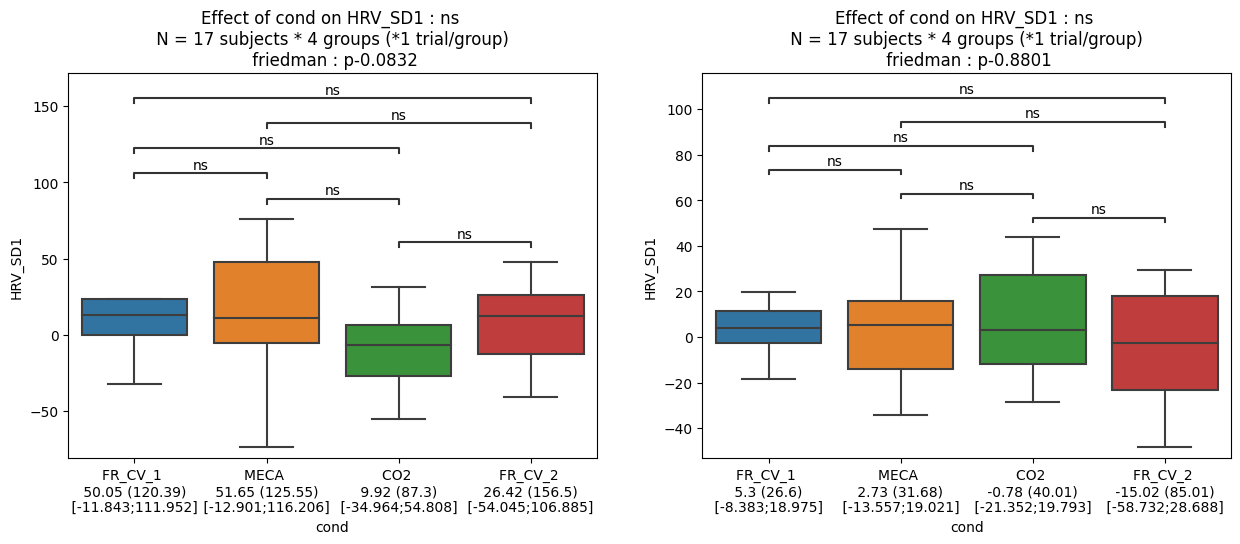

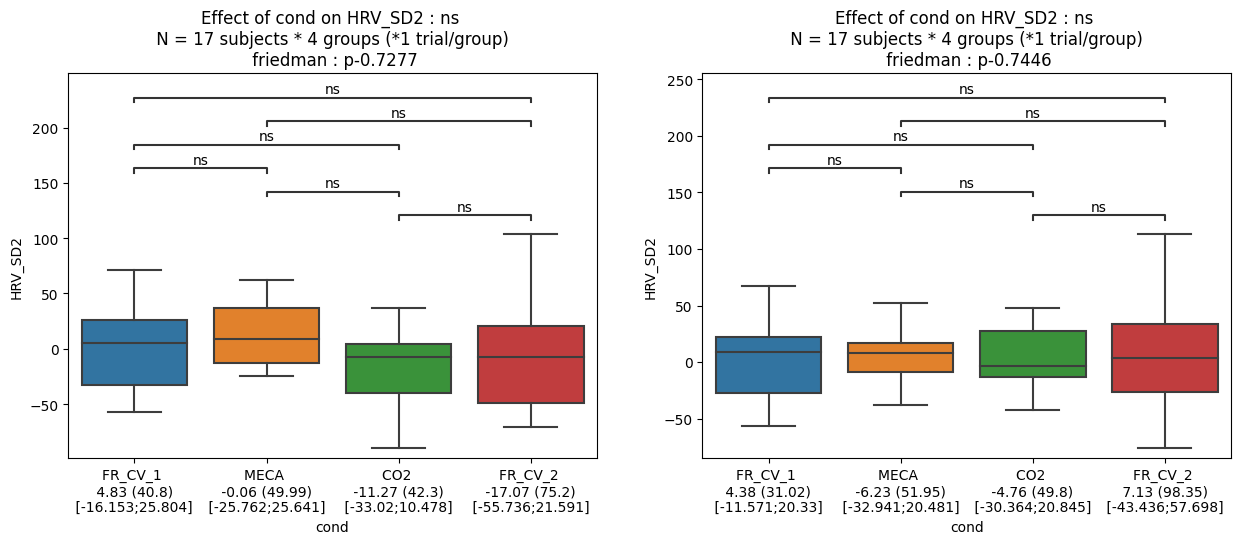

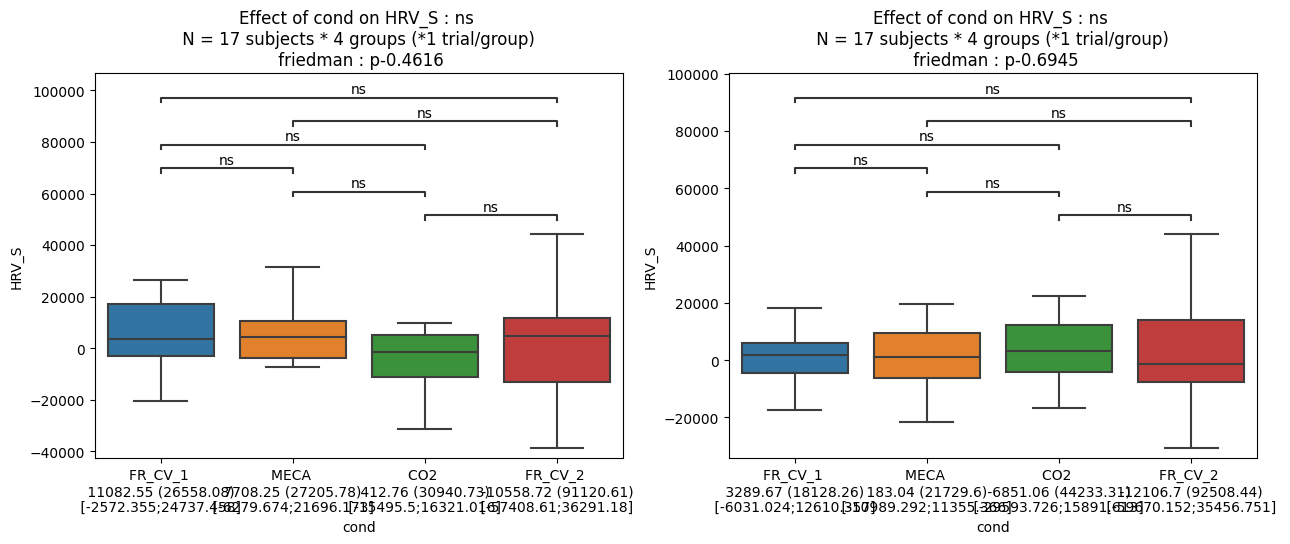

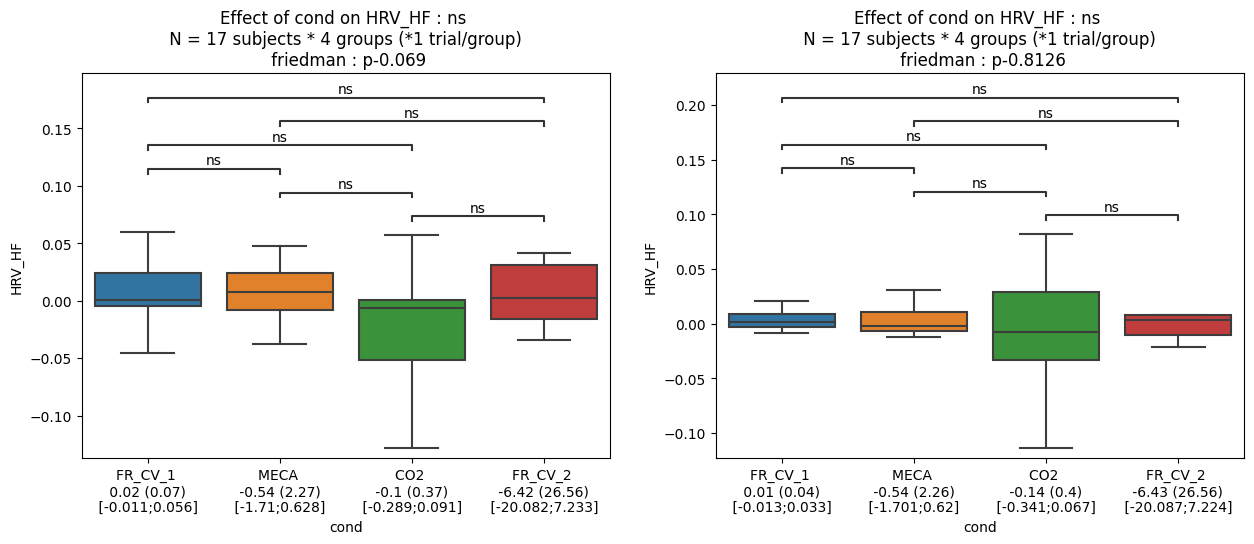

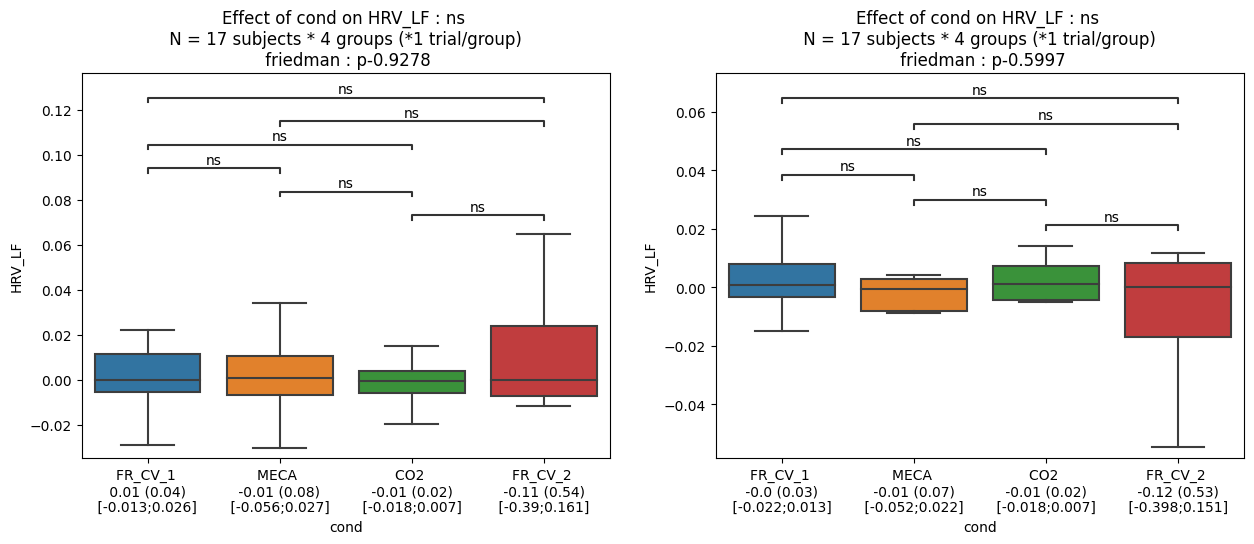

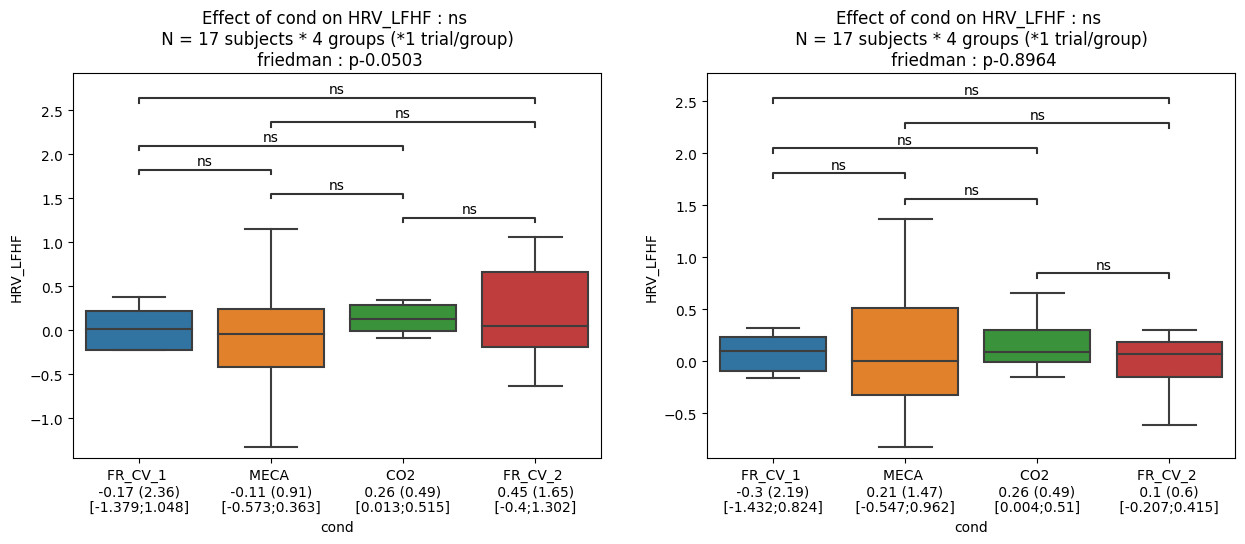

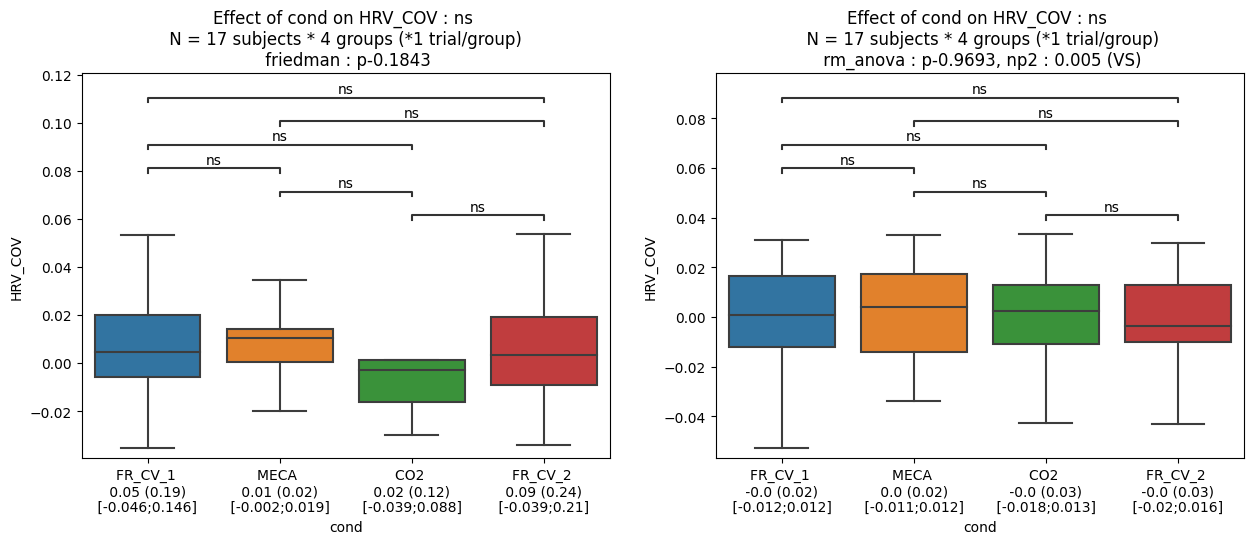

In [77]:
predictor = 'cond' 

odor_list_diff = ['+', '-'] 
print(odor_list_diff)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=len(odor_list_diff))
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, odor_i in enumerate(odor_list_diff):
        
        ax = axs[c]
        df_stats = df_diff_hrv.query(f"odor == '{odor_i}' & sujet in {sujet_best}")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)


## odor

/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/crnldata/cmo/multisite/DATA_MANIP/EEG_Paris_J/Script_Python_EEG_Paris_git/n0ter_stats.py:382: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rena

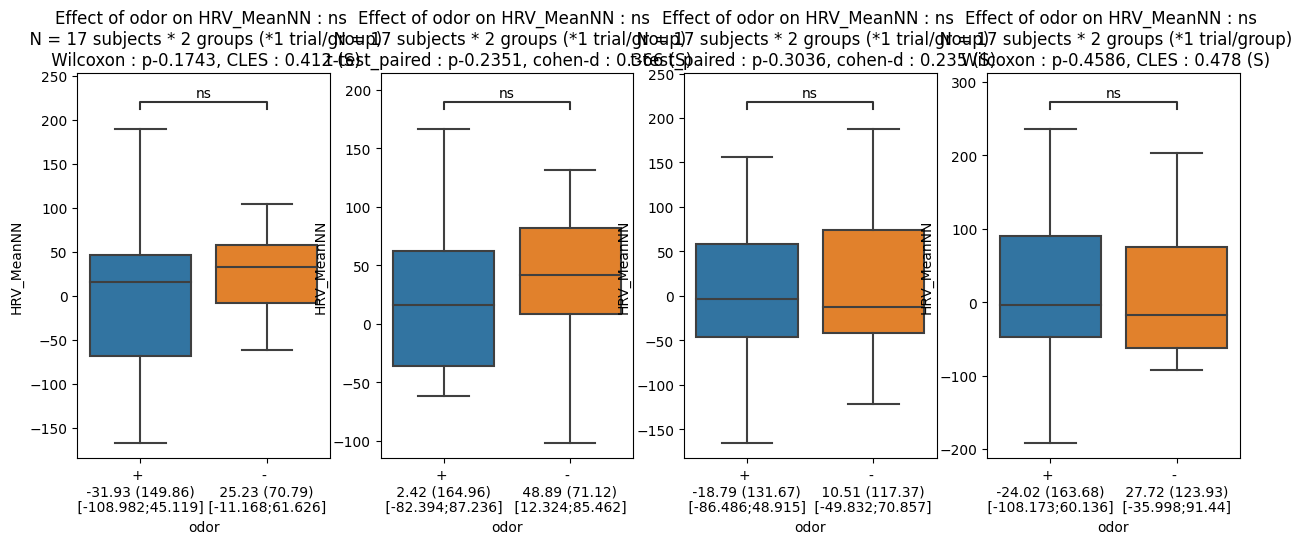

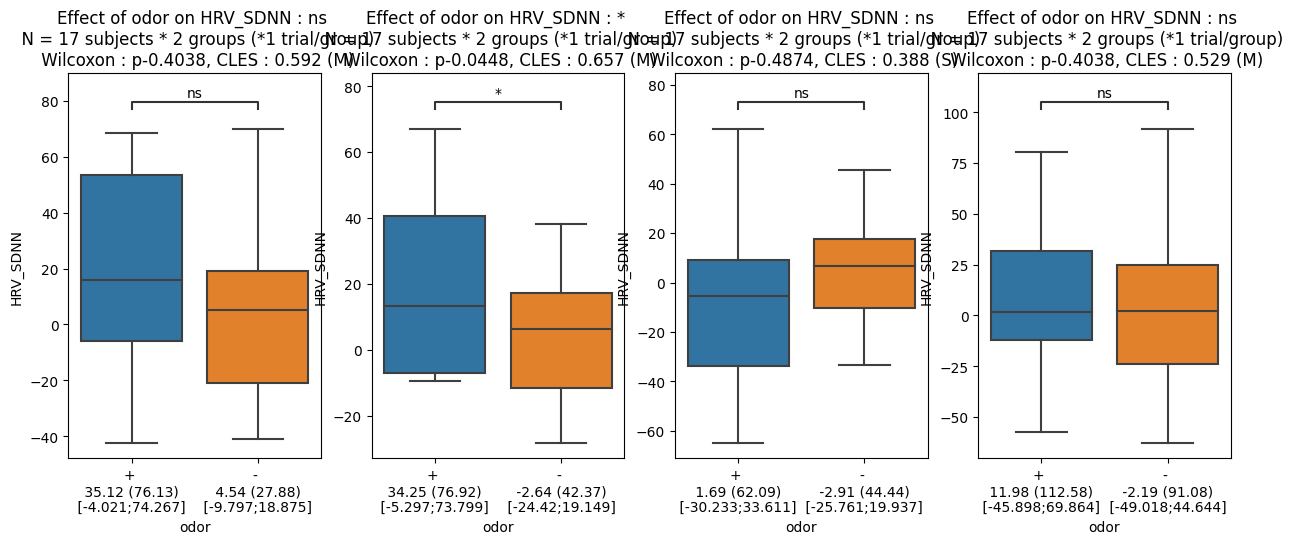

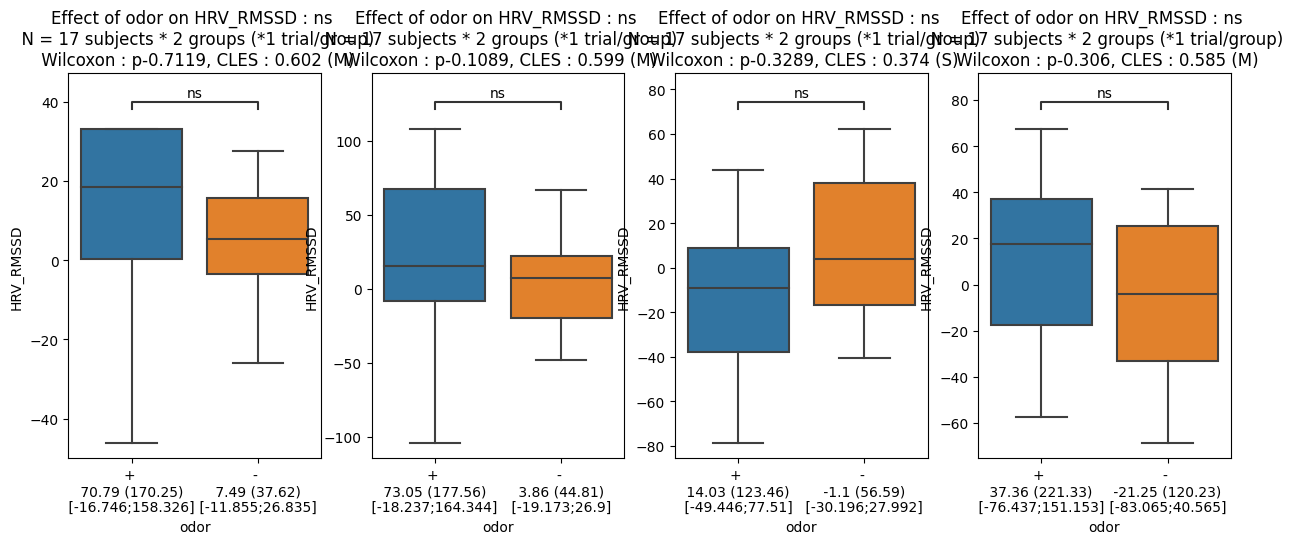

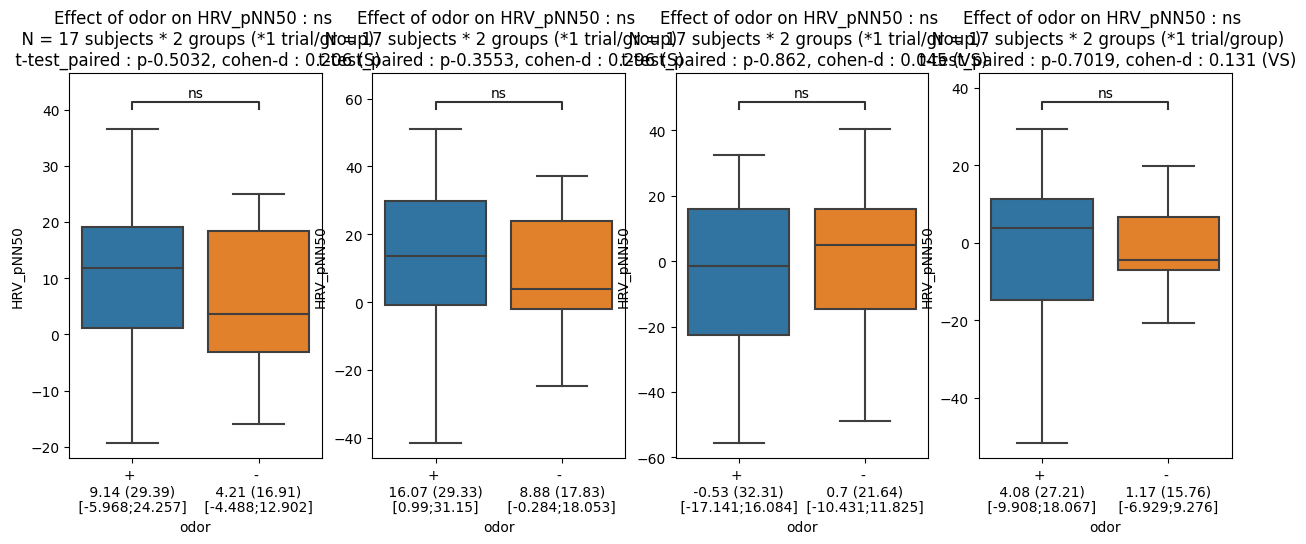

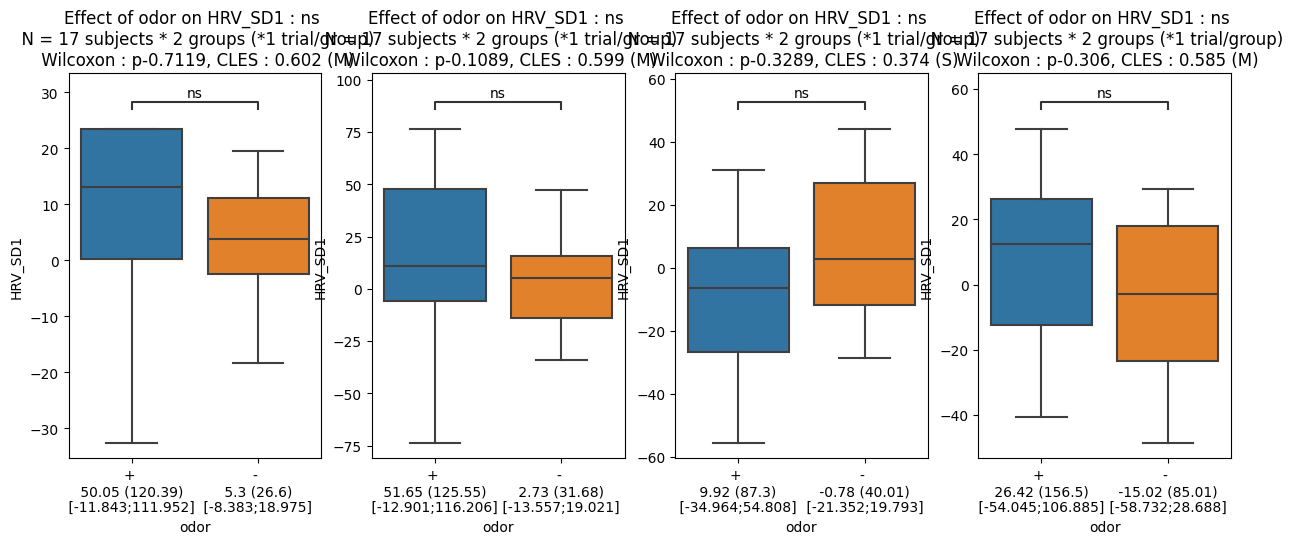

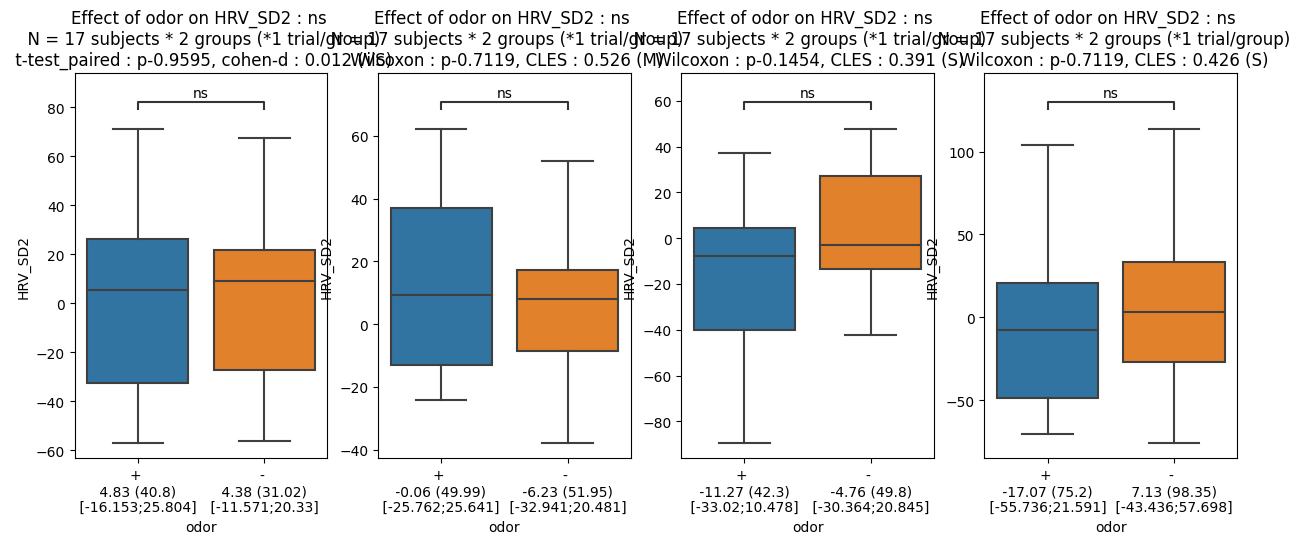

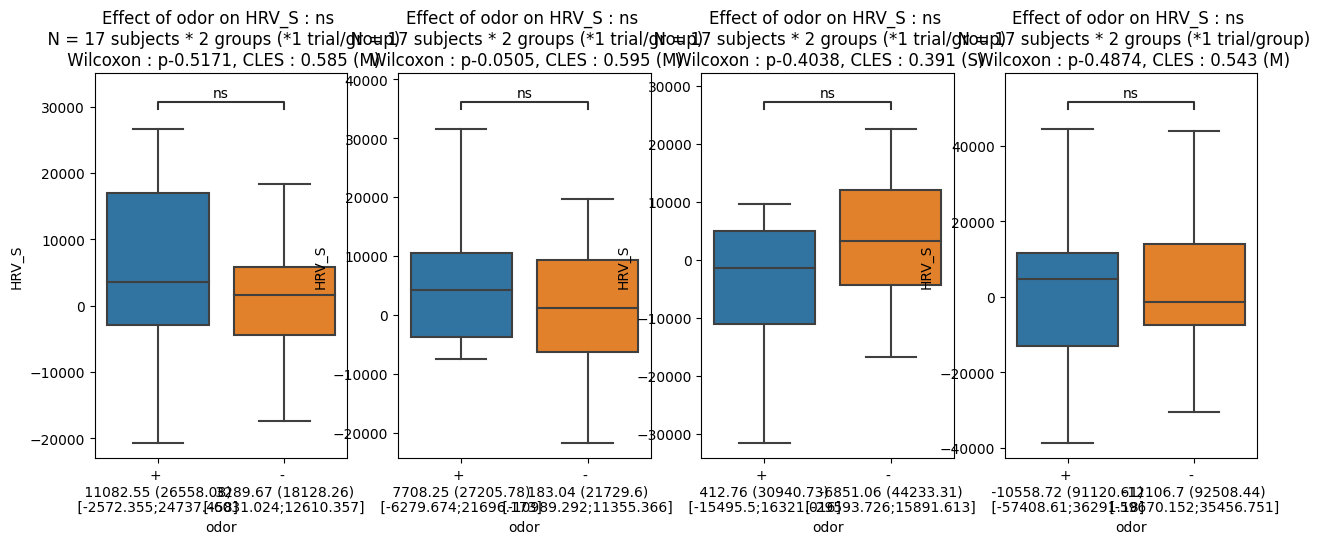

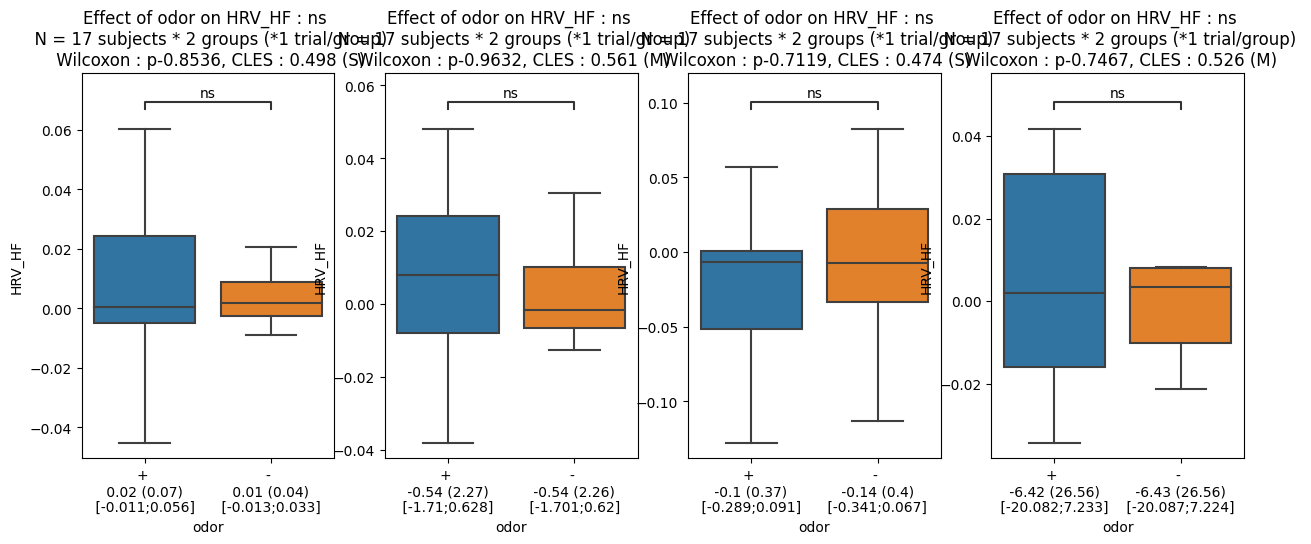

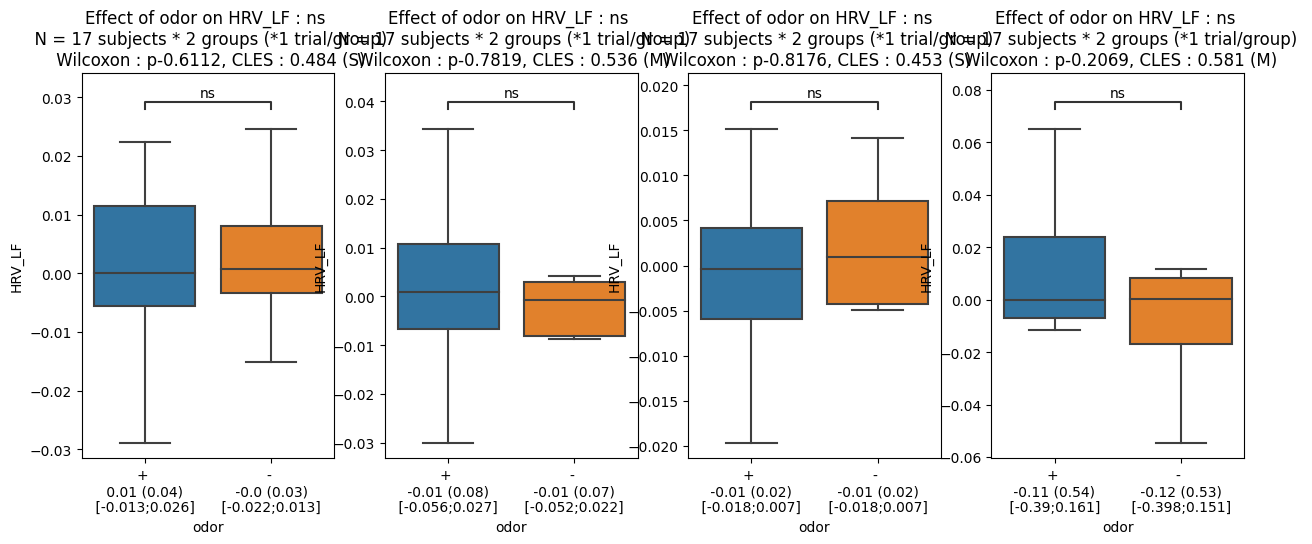

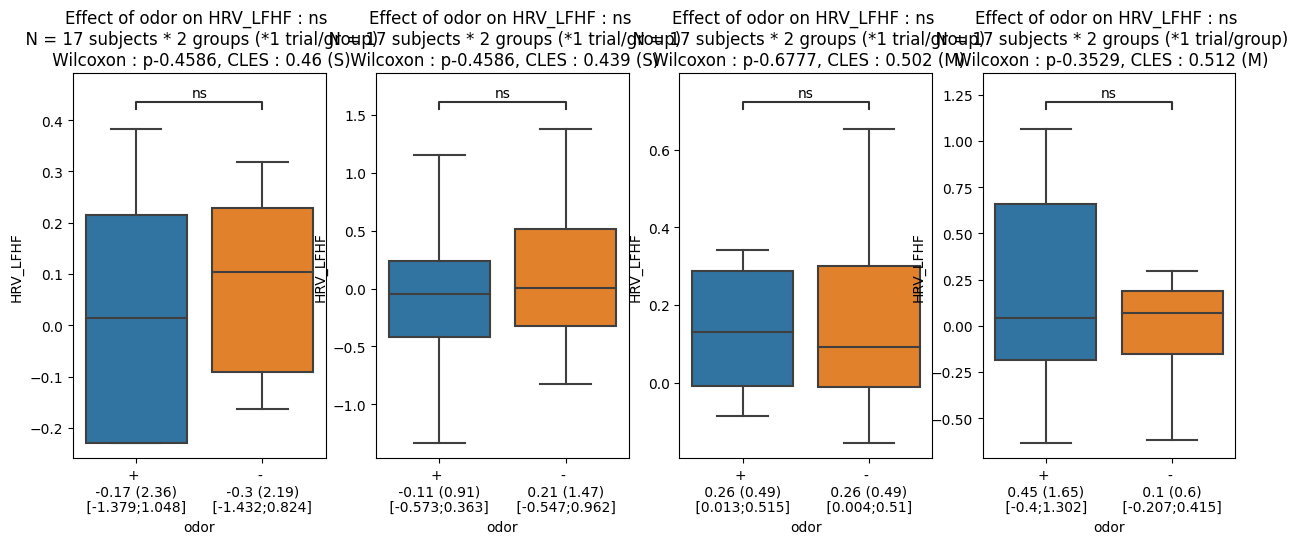

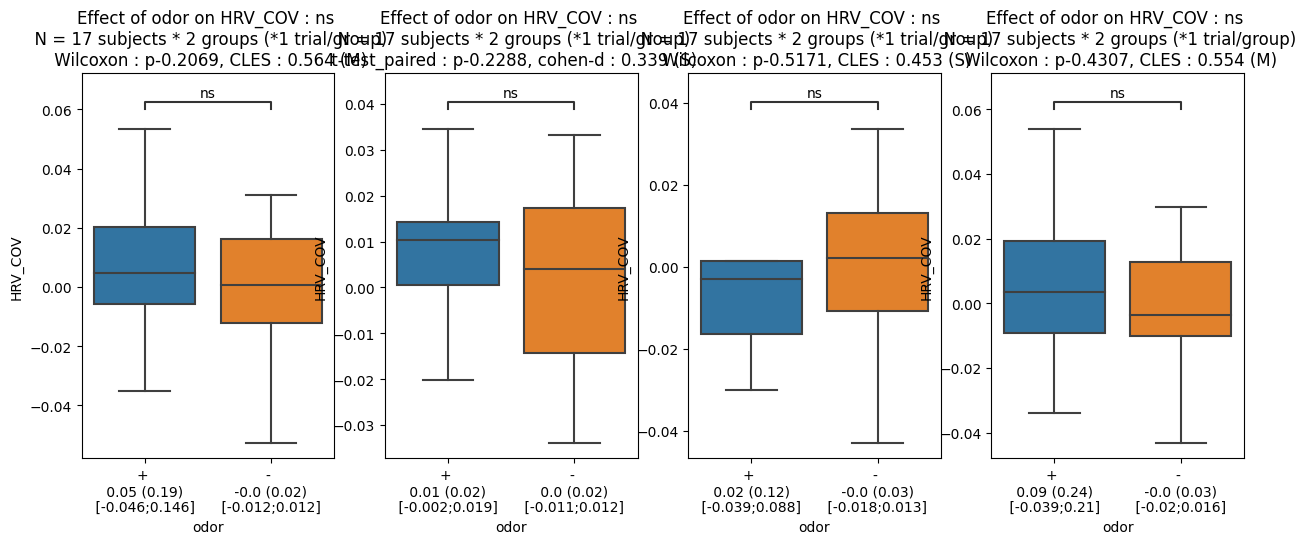

In [78]:
predictor = 'odor' 

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_diff_hrv.query(f"cond == '{cond}' & sujet in {sujet_best}")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)